# Módulo 3 - Ejercicio Evaluación Final

## Fase 1 - Exploración

In [2]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda
from src import soporte_correlacion as sp_corr

### Carga de datos archivo Customer Flight Activity.csv:

In [3]:
# Este archivo contiene información sobre la actividad de vuelo de los clientes, 
# incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos.

df_fa = pd.read_csv("files/Customer Flight Activity.csv")
df_fa.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [4]:
sp_eda.exploracion_basica(df_fa, secciones=['info', 'nulos', 'duplicados', 'num_desc', 'cat_desc'])

### Información general del DataFrame ###
Forma (filas, columnas): (405624, 10)
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Point

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



### No hay columnas categóricas para describir ###


Comprobamos esas filas duplicadas:

In [5]:
duplicados = df_fa[df_fa.duplicated(keep=False)]
duplicados.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
566,130331,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
659,135421,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


Como se puede observar, esas filas son idénticas entre ellas (incluyendo sobre todo el id Loyalty Number y Year/Month, que son las que servirían para diferenciar unas con otras) así que podemos eliminarlas todas:

In [6]:
df_fa = df_fa.drop_duplicates()     # Mantiene la primera y elimina las subsecuentes (keep='first' por defecto).

In [7]:
sp_eda.exploracion_basica(df_fa, secciones=['info', 'duplicados'])

### Información general del DataFrame ###
Forma (filas, columnas): (403760, 10)
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Red

In [8]:
sp_eda.exploracion_basica(df_fa, secciones=['num_desc'])


### Estadísticas descriptivas para variables numéricas ###


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [9]:
df_fa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [10]:
# Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. 
# Cada número de lealtad corresponde a un cliente específico.

In [11]:
sp_eda.exploracion_num(df_fa,'Year', graficos=False, mostrar_estadisticas=False, mostrar_outliers=False)
# Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.

La columna 'Year' es de tipo int64.
El número total de valores únicos es de 2.
Los valores únicos son: [2017 2018]
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(2017),
 'max': np.int64(2018),
 'mean': np.float64(2017.5),
 'median': np.float64(2018.0),
 'std': np.float64(0.5),
 'percentil_25': np.float64(2017.0),
 'percentil_75': np.float64(2018.0)}

In [12]:
sp_eda.exploracion_num(df_fa,'Month', graficos=False, mostrar_estadisticas=False, mostrar_outliers=False)
# Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

La columna 'Month' es de tipo int64.
El número total de valores únicos es de 12.
Los valores únicos son: [ 1  9  2  3 11  4  5  7  6  8 10 12]
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(1),
 'max': np.int64(12),
 'mean': np.float64(6.5),
 'median': np.float64(7.0),
 'std': np.float64(3.45),
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(10.0)}

In [13]:
df_fa.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
226949,189817,2018,3,6,0,6,954,102.6,0,0
331632,660030,2018,8,5,0,5,4105,410.0,0,0
216876,692275,2018,10,1,1,2,1848,184.0,505,41


La columna 'Flights Booked' es de tipo int64.
El número total de valores únicos es de 22.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Flights Booked':
 - min: 0
 - max: 21
 - mean: 4.13
 - median: 1.0
 - std: 5.23
 - percentil_25: 0.0
 - percentil_75: 8.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          4.134050
std           5.230064
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: Flights Booked, dtype: float64
--------------------------------------------------------------------------


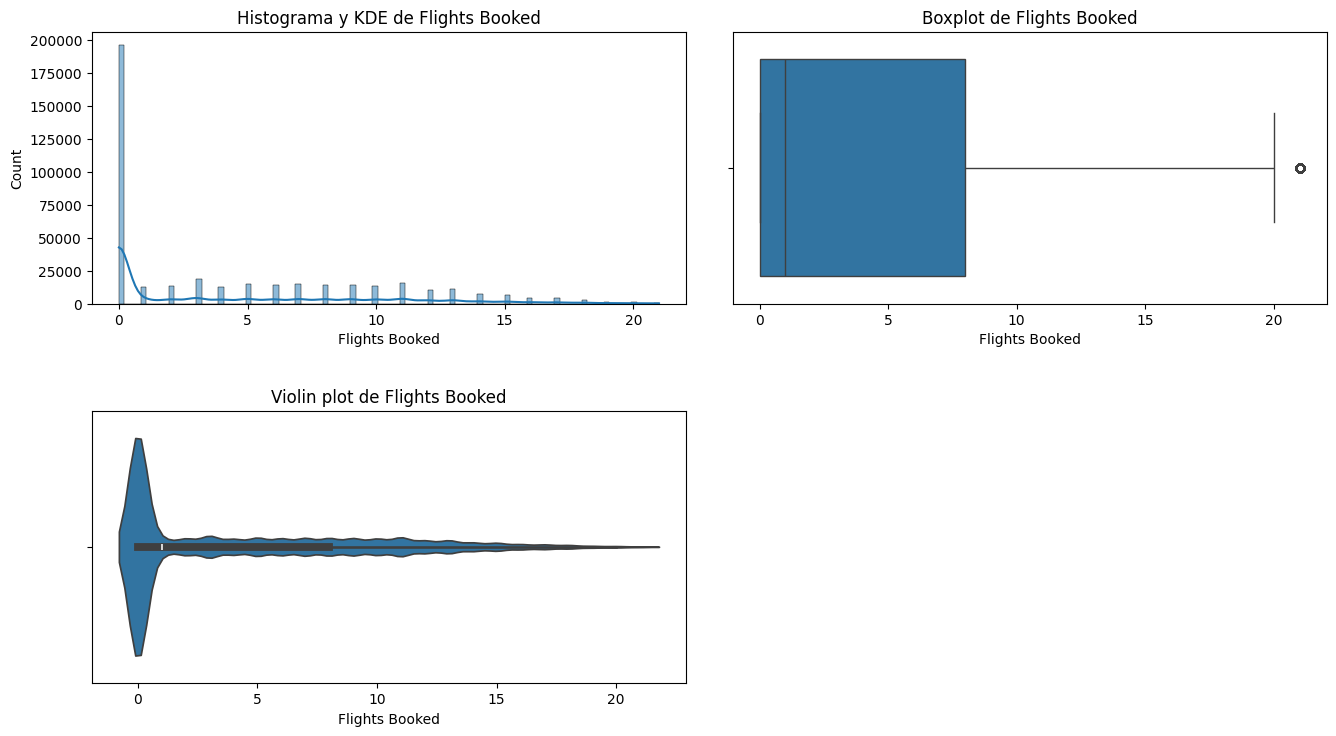

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(21),
 'mean': np.float64(4.13),
 'median': np.float64(1.0),
 'std': np.float64(5.23),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(8.0)}

In [14]:
sp_eda.exploracion_num(df_fa,'Flights Booked', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.

Flights Booked --> Distribución extremadamente sesgada hacia la derecha (el 48.58% del dataset tiene 0 vuelos, solo el 25% superior supera los 8 vuelos). Distribución 'long tail'. Tiene varios ouliers que podrían estudiarse más profundamente como Next Steps.

In [15]:
round(df_fa['Flights Booked'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Flights Booked
0     48.58
1      3.14
2      3.38
3      4.51
4      3.18
5      3.74
6      3.43
7      3.61
8      3.56
9      3.51
10     3.31
11     3.89
12     2.57
13     2.67
14     1.75
15     1.63
16     1.08
17     0.97
18     0.73
19     0.37
20     0.29
21     0.13
Name: proportion, dtype: float64

In [16]:
sp_eda.exploracion_num(df_fa,'Flights Booked', graficos=False, mostrar_estadisticas=False, mostrar_outliers=True)

La columna 'Flights Booked' es de tipo int64.
El número total de valores únicos es de 22.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19]

🔍 Número de outliers detectados: 528
Conteo de outliers por valor único:
Flights Booked
21    528
Name: count, dtype: int64
--------------------------------------------------------------------------
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(21),
 'mean': np.float64(4.13),
 'median': np.float64(1.0),
 'std': np.float64(5.23),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(8.0),
 'outliers_count': 528,
 'outliers_unique_values': {21: 528}}

La columna 'Flights with Companions' es de tipo int64.
El número total de valores únicos es de 12.
Los valores únicos son: [ 0  4  7  1  6  3  5  2 10  8  9 11]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Flights with Companions':
 - min: 0
 - max: 11
 - mean: 1.04
 - median: 0.0
 - std: 2.08
 - percentil_25: 0.0
 - percentil_75: 1.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          1.036569
std           2.080472
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: Flights with Companions, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 71560
Conteo de outliers por valor único:
Flights with Companions
3     19015
4     13665
5     13424
6      9911
7      7089
8      3965
9      2944
10     1071
1

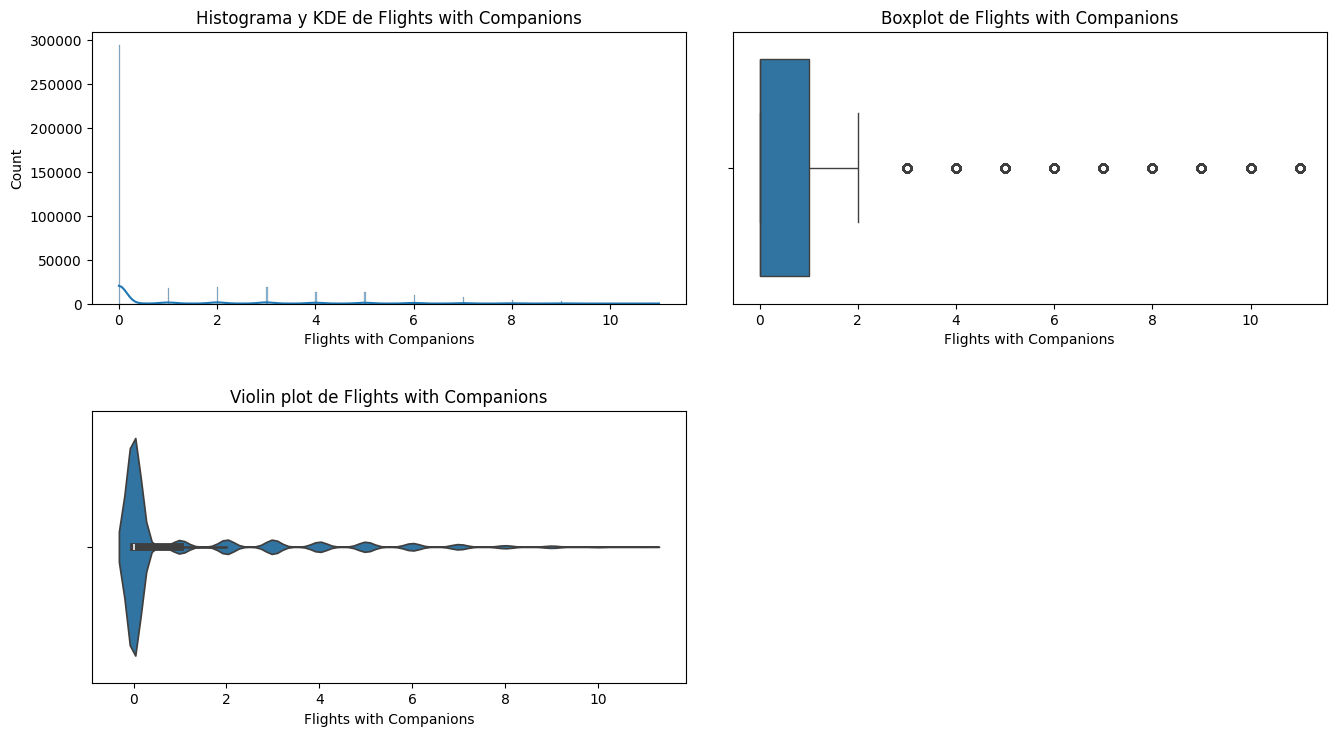

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(11),
 'mean': np.float64(1.04),
 'median': np.float64(0.0),
 'std': np.float64(2.08),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(1.0),
 'outliers_count': 71560,
 'outliers_unique_values': {3: 19015,
  4: 13665,
  5: 13424,
  6: 9911,
  7: 7089,
  8: 3965,
  9: 2944,
  10: 1071,
  11: 476}}

In [17]:
sp_eda.exploracion_num(df_fa,'Flights with Companions', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.

Flights with Companions --> Distribución muy sesgada a la derecha. Percentil 25% = 0 --> Más del 50% de los clientes nunca volaron con acompañantes. Distribución 'long tail'. Tiene varios ouliers que podrían estudiarse más profundamente como Next Steps.

In [18]:
round(df_fa['Flights with Companions'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Flights with Companions
0     73.07
1      4.43
2      4.77
3      4.71
4      3.38
5      3.32
6      2.45
7      1.76
8      0.98
9      0.73
10     0.27
11     0.12
Name: proportion, dtype: float64

La columna 'Total Flights' es de tipo int64.
El número total de valores únicos es de 33.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Total Flights':
 - min: 0
 - max: 32
 - mean: 5.17
 - median: 1.0
 - std: 6.53
 - percentil_25: 0.0
 - percentil_75: 10.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          5.170619
std           6.526858
min           0.000000
25%           0.000000
50%           1.000000
75%          10.000000
max          32.000000
Name: Total Flights, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 1984
Conteo de outliers por valor único:
Total Flights
26    722
27    504
28    306
29    214
30    150
31     61
32     27
Name: count, dtyp

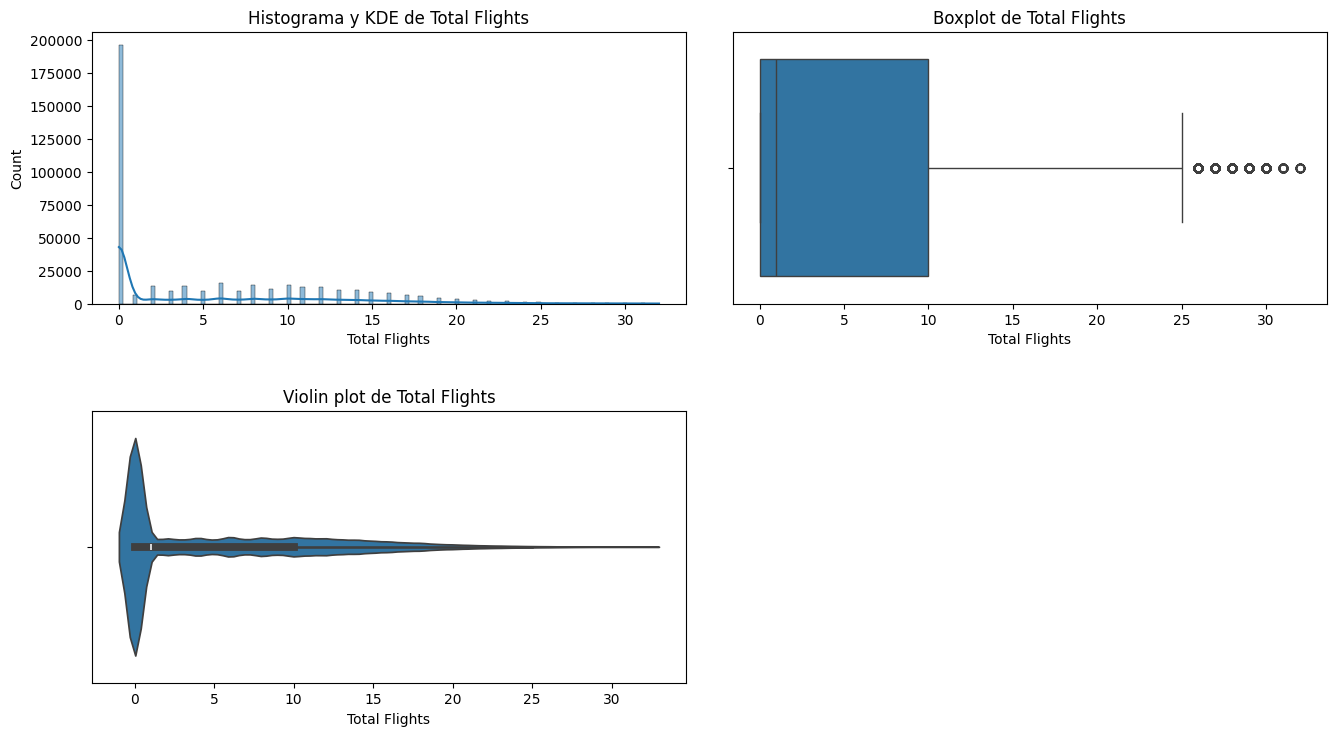

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(32),
 'mean': np.float64(5.17),
 'median': np.float64(1.0),
 'std': np.float64(6.53),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(10.0),
 'outliers_count': 1984,
 'outliers_unique_values': {26: 722,
  27: 504,
  28: 306,
  29: 214,
  30: 150,
  31: 61,
  32: 27}}

In [19]:
sp_eda.exploracion_num(df_fa,'Total Flights', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.

Total Flights --> Distribución extremadamente sesgada a la derecha. Percentil 25% = 0 --> Al menos el 25% no han volado nunca y al menos el 50% han volado como mucho 1 vez. La media es mayor porque hay un grupo más pequeño de clientes que voló muchas veces, el 25% superior viaja bastante (+10 viajes). Distribución 'long tail'. Tiene varios ouliers que podrían estudiarse más profundamente como Next Steps.

La columna 'Distance' es de tipo int64.
El número total de valores únicos es de 4746.
Hay muchos valores únicos, aquí algunos ejemplos: [1521 2030 1200    0  606 2037 4245 1144 3264 2340 1236 3124 2296 2772
 2944 1100 1332 2082 3399 3128]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Distance':
 - min: 0
 - max: 6293
 - mean: 1214.46
 - median: 525.0
 - std: 1434.1
 - percentil_25: 0.0
 - percentil_75: 2342.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean       1214.460979
std        1434.098521
min           0.000000
25%           0.000000
50%         525.000000
75%        2342.000000
max        6293.000000
Name: Distance, dtype: float64
--------------------------------------------------------------------------


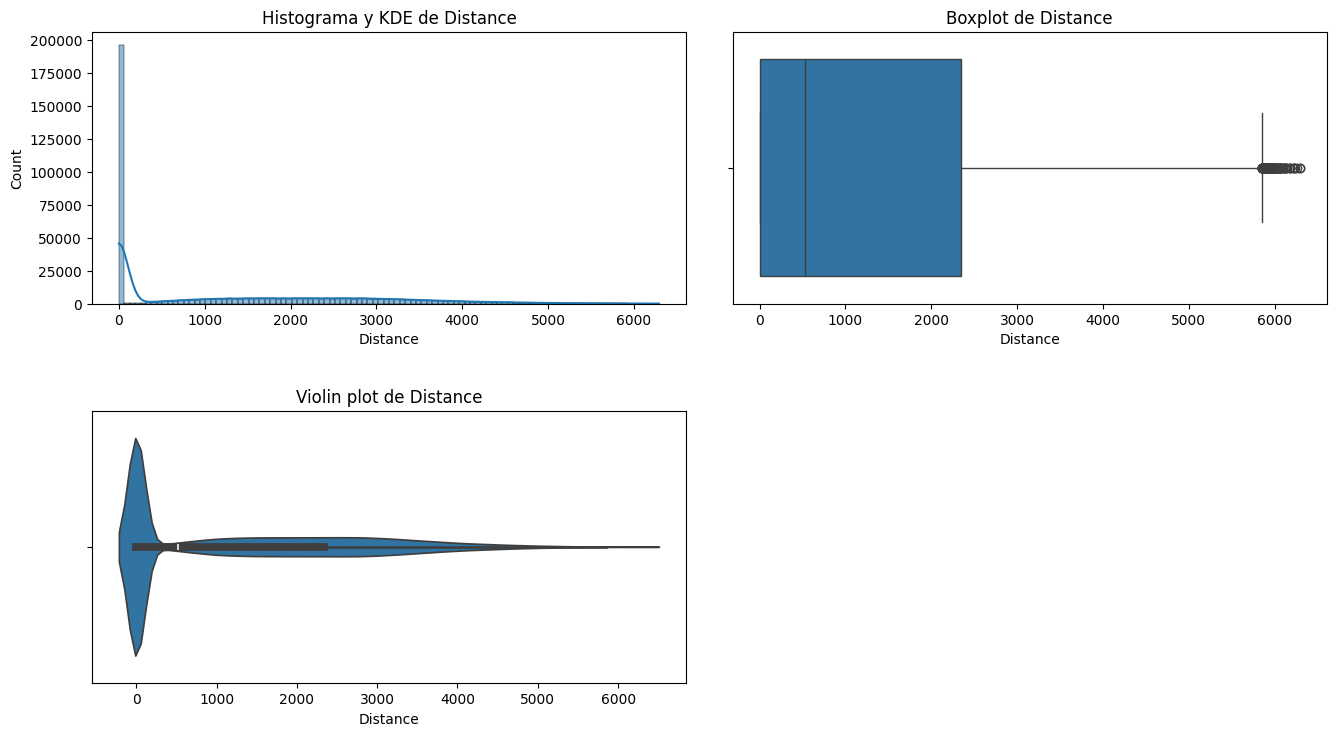

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(6293),
 'mean': np.float64(1214.46),
 'median': np.float64(525.0),
 'std': np.float64(1434.1),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(2342.0)}

In [20]:
sp_eda.exploracion_num(df_fa,'Distance', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.

Distance --> Mucha diversidad en las distancias (muchos valores únicos). Distribución muy sesgada a la derecha: Percentil 25% = 0, la mediana es mucho menor que la media, la 'long tail' sube la media. Alta desviación estándard que refleja una gran dispersión. Tiene bastantes ouliers que podrían estudiarse más profundamente como Next Steps.

La columna 'Points Accumulated' es de tipo float64.
El número total de valores únicos es de 1549.
Hay muchos valores únicos, aquí algunos ejemplos: [152. 203. 120.   0.  60. 424. 114. 326. 234. 123. 312. 229. 277. 294.
 110. 133. 208. 339.  65. 151.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Points Accumulated':
 - min: 0.0
 - max: 676.5
 - mean: 124.26
 - median: 53.0
 - std: 146.7
 - percentil_25: 0.0
 - percentil_75: 240.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean        124.263761
std         146.696179
min           0.000000
25%           0.000000
50%          53.000000
75%         240.000000
max         676.500000
Name: Points Accumulated, dtype: float64
--------------------------------------------------------------------------


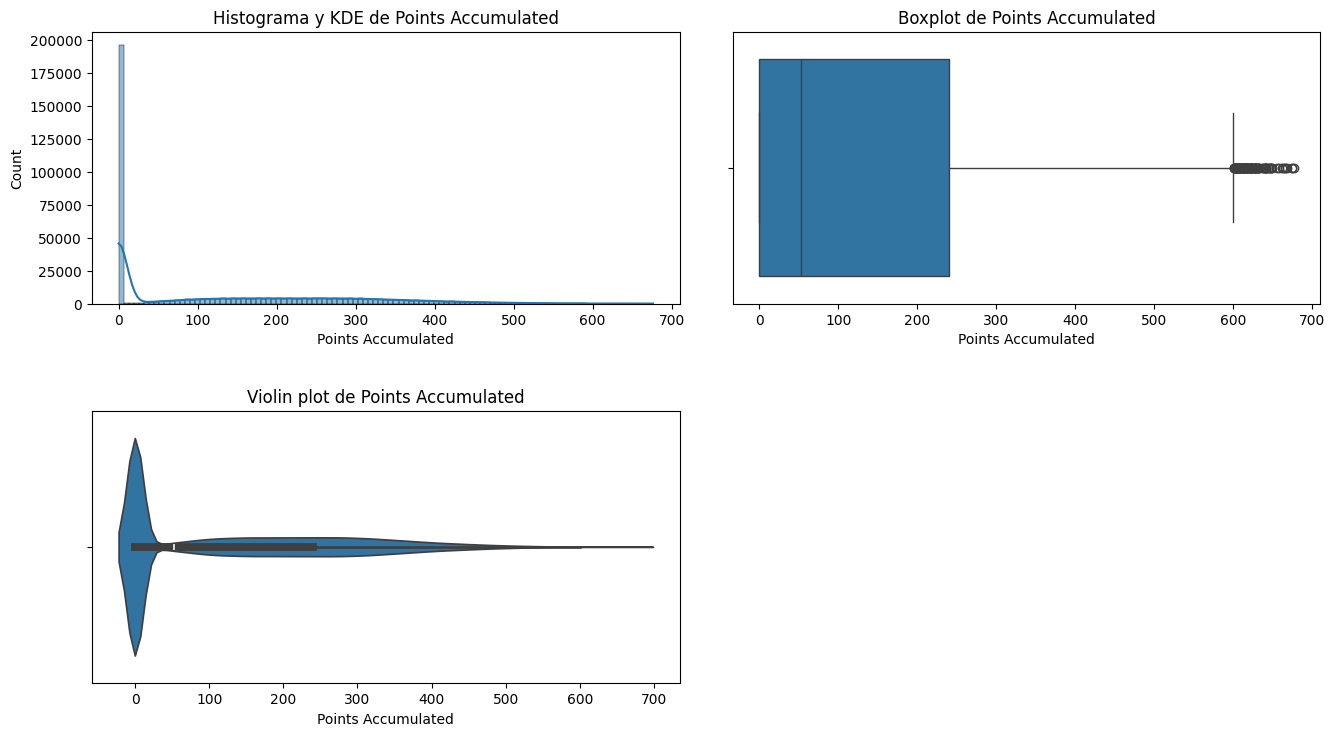

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(0.0),
 'max': np.float64(676.5),
 'mean': np.float64(124.26),
 'median': np.float64(53.0),
 'std': np.float64(146.7),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(240.0)}

In [21]:
sp_eda.exploracion_num(df_fa,'Points Accumulated', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes, 
# con base en la distancia volada u otros factores.

Points Accumulated --> Única columna de tipo float64. El 25% tienen 0 puntos acumulados, un cuarto de los clientes no ha acumulado puntos. La distribución está sesgada a la derecha, con unos pocos clientes acumulando muchos puntos, por eso la media es más del doble que la mediana. Alta desviación estándard que refleja una gran dispersión. El valor 0 es importante y refleja falta de participación o uso del programa. Tiene bastantes ouliers que podrían estudiarse más profundamente como Next Steps.

Para comprobar si realmente hay valores con decimales diferentes de 0 y por lo tanto, decidir si tiene sentido mantener la columna de tipo float y no int:

In [22]:
# Se filtran filas con decimales no enteros y se muestran algunas:
decimales_no_enteros = df_fa[df_fa['Points Accumulated'] % 1 != 0]['Points Accumulated'].unique()

print(sorted(decimales_no_enteros)[:20])  # muestra los primeros 20 valores con decimales


[np.float64(9.72), np.float64(10.8), np.float64(11.25), np.float64(11.88), np.float64(12.5), np.float64(12.96), np.float64(16.2), np.float64(16.25), np.float64(17.28), np.float64(18.36), np.float64(18.75), np.float64(19.44), np.float64(20.52), np.float64(21.25), np.float64(21.6), np.float64(22.5), np.float64(22.68), np.float64(23.75), np.float64(23.76), np.float64(24.84)]


In [23]:
df_fa[df_fa['Points Accumulated'].isin([9.72,10.8,16.2])]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
219718,605761,2018,2,1,0,1,91,9.72,0,0
219742,686783,2018,2,1,1,2,156,16.20,0,0
219744,207821,2018,4,1,0,1,95,9.72,0,0
219755,378267,2018,2,1,0,1,97,9.72,0,0
219794,478770,2018,2,1,0,1,103,10.80,0,0
220372,172233,2018,2,1,0,1,153,16.20,0,0
220397,729154,2018,4,1,0,1,154,16.20,0,0
220440,374345,2018,2,1,0,1,157,16.20,0,0
283038,721456,2018,4,1,0,1,99,9.72,0,0


Efectivamente hay valores con decimales.

La columna 'Points Redeemed' es de tipo int64.
El número total de valores únicos es de 587.
Hay muchos valores únicos, aquí algunos ejemplos: [  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Points Redeemed':
 - min: 0
 - max: 876
 - mean: 30.84
 - median: 0.0
 - std: 125.76
 - percentil_25: 0.0
 - percentil_75: 0.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean         30.838587
std         125.758002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         876.000000
Name: Points Redeemed, dtype: float64
--------------------------------------------------------------------------


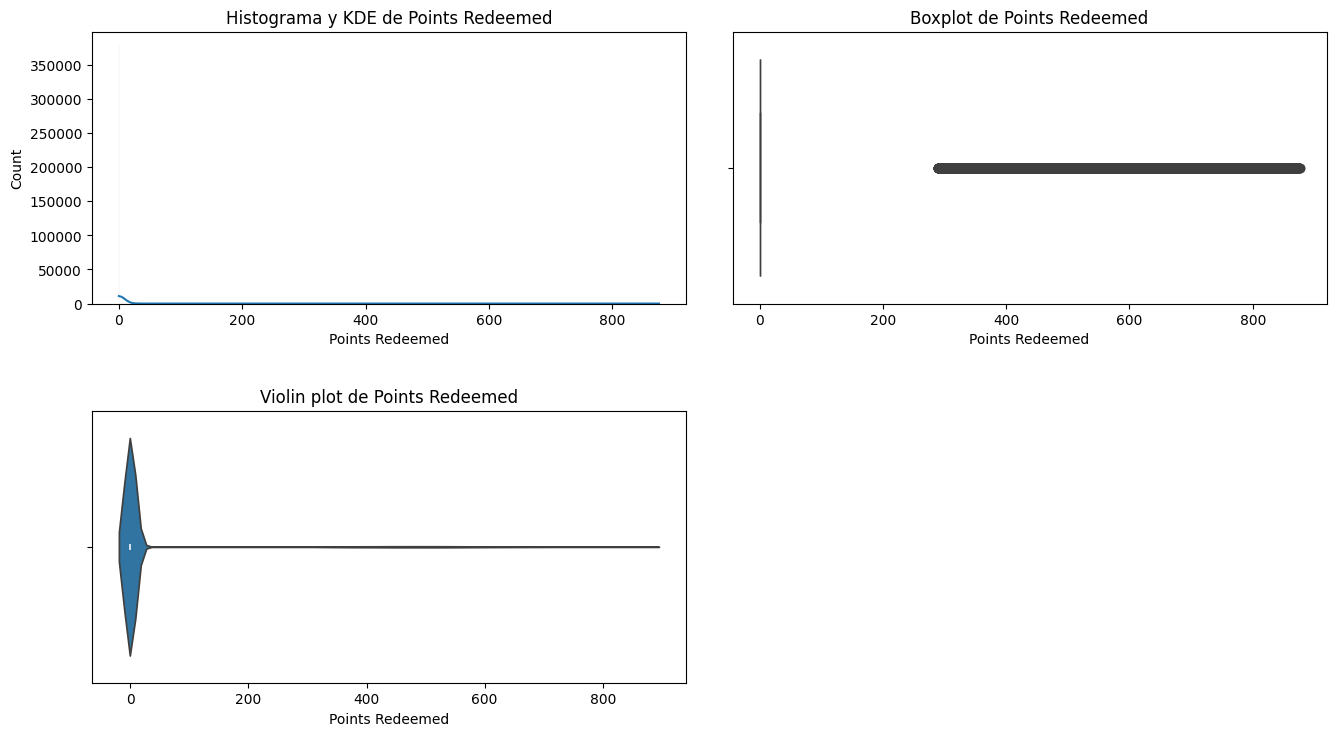

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(876),
 'mean': np.float64(30.84),
 'median': np.float64(0.0),
 'std': np.float64(125.76),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(0.0)}

In [24]:
sp_eda.exploracion_num(df_fa,'Points Redeemed', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.

Points Redeemed --> Variable fuertemente sesgada a la derecha, mayoría sin canjes y pocos canjes grandes. El 25%, 50% y 75% percentiles son 0, lo que indica que al menos el 75% de los clientes no han canjeado puntos. La media és muy por encima de la mediana porque un pequeño grupo de clientes canjea muchos puntos. Alta desviación estándard que refleja una gran dispersión. Prácticamente se consideran outliers todos los valores diferentes de 0.

En la columna Points Redeemed, el 25%, 50% y 75% percentiles son 0, lo que indica que al menos el 75% de los clientes no han canjeado puntos. Por eso el boxplot se ve como una línea en 0.

### Mediana y percentiles:
- Points Accumulated:
    - Mediana = 53 → La mitad de los clientes acumulan más de 53 puntos.
    - Percentil 25 = 0 → Un 25% de clientes no acumulan puntos.

- Points Redeemed:
    - Mediana = 0 → La mitad de los clientes no redimen ningún punto.
    - Percentiles 25 y 75 también en 0 → Al menos el 75% no gastan puntos.

### Promedios (Media):
- Media acumulada = 124.26 puntos → En promedio, los clientes acumulan una cantidad considerable de puntos.
- Media redimida = 30.84 puntos → Pero en promedio se gastan menos puntos que los acumulados.

### Conclusión
- La mayoría acumula puntos, porque la mediana está bastante por encima de cero.
- Pero la mayoría no redime puntos (mediana y percentiles 25 y 75 en 0), o redime muy poco en promedio.
- Por lo tanto:
    - Hay muchos clientes que acumulan puntos pero no los gastan o gastan muy pocos.

In [25]:
# Porcentaje de clientes que acumularon pero no redimieron
no_redeemed_but_accumulated = ((df_fa["Points Accumulated"] > 0) & (df_fa["Points Redeemed"] == 0)).mean()
print(f"Porcentaje clientes que acumulan pero no redimen: {no_redeemed_but_accumulated:.2%}")

Porcentaje clientes que acumulan pero no redimen: 45.44%


La columna 'Dollar Cost Points Redeemed' es de tipo int64.
El número total de valores únicos es de 49.
Hay muchos valores únicos, aquí algunos ejemplos: [ 0 28 30 25 36 32 24 26 37 33 35 27 31 54 42 29 38 34 39 55]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Dollar Cost Points Redeemed':
 - min: 0
 - max: 71
 - mean: 2.5
 - median: 0.0
 - std: 10.17
 - percentil_25: 0.0
 - percentil_75: 0.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          2.495973
std          10.172033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          71.000000
Name: Dollar Cost Points Redeemed, dtype: float64
--------------------------------------------------------------------------


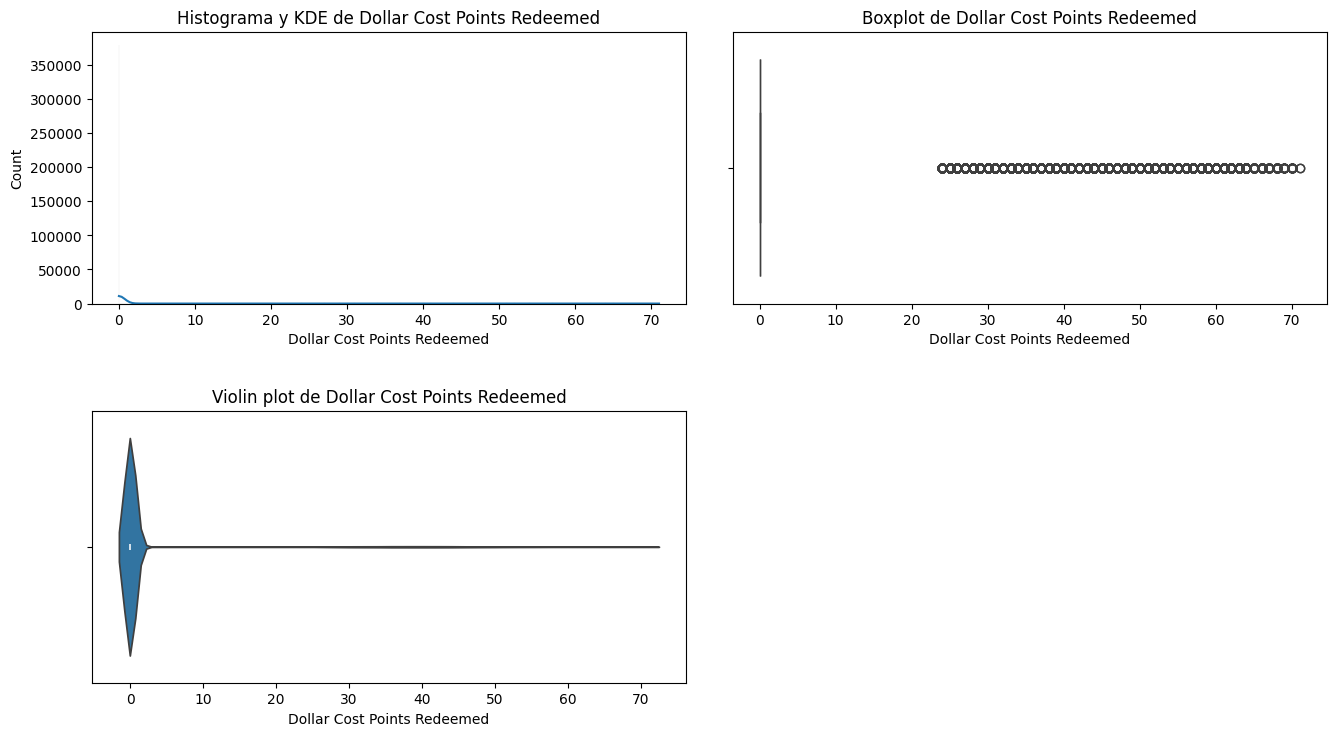

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(71),
 'mean': np.float64(2.5),
 'median': np.float64(0.0),
 'std': np.float64(10.17),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(0.0)}

In [26]:
sp_eda.exploracion_num(df_fa,'Dollar Cost Points Redeemed', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante el mes.

Dollar Cost Points Redeemed --> El 75% de los valores son 0, lo que indica que la mayoría no canjearon puntos. La media es baja (2.5) pero hay casos con costos altos de hasta 71 dólares, por eso también hay una desviación estándar alta (alta dispersión). Al igual que en 'Points Redeemed', se consideran outliers todos los valores diferentes de 0. 

Igual que ocurría con la columna Points Redeemed, en Dollar Cost Points Redeemed el 25%, 50% y 75% percentiles son 0, lo que indica que al menos el 75% de los clientes no han canjeado puntos. Por eso el boxplot se ve como una línea en 0.

Aprovechamos para comprobar con el siguiente scatterplot cómo efectivamente las 3 variables 'Points Redeemed', 'Dollar Cost Points Redeemed' y 'Points Accumulated' están correlacionadas, tanto los ceros como los outliers.

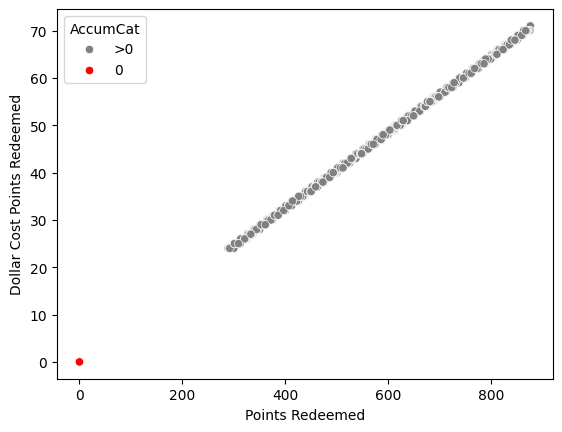

In [ ]:
df_fa["AccumCat"] = df_fa["Points Accumulated"].apply(lambda x: "0" if x == 0 else ">0")
# Para ver solo dos colores: rojo si es 0 y gris si es >0, entonces hay que crear una columna categórica primero.
# Para cada fila, toma el valor de "Points Accumulated" y le aplica una función: for cada x en Points Accumulated: aplicar función(x)
# Si x es exactamente 0, devuelvo la cadena "0". Si no, devuelvo la cadena ">0"”

sns.scatterplot(data=df_fa, x="Points Redeemed", y="Dollar Cost Points Redeemed", hue="AccumCat", palette={"0": "red", ">0": "grey"})
plt.show()

- Puntos rojos: Personas que NO participan en el programa, no ganan ni gastan puntos.
- Puntos grises: Cada punto gris es un cliente que acumuló puntos (AccumCat = ">0")

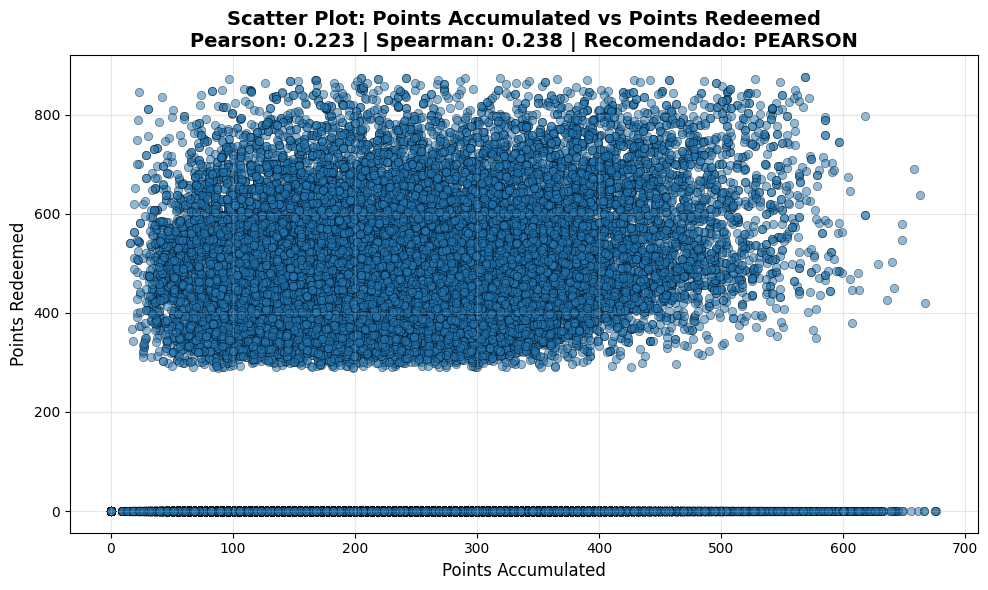

{'pearson': np.float64(0.22267381162511402),
 'spearman': np.float64(0.2381659548763351),
 'diferencia': np.float64(0.015492143251221085),
 'recomendacion': 'pearson',
 'valor_recomendado': np.float64(0.22267381162511402),
 'fuerza': 'débil',
 'direccion': 'positiva',
 'n_validos': 403760,
 'n_total': 403760,
 'interpretacion': '\n✅ USAR PEARSON (r = 0.223)\n   \n   Razón: La diferencia entre Pearson y Spearman es pequeña (0.015).\n   Esto indica una relación aproximadamente lineal sin outliers significativos.\n   \n   Pearson: 0.223\n   Spearman: 0.238\n   \n   Datos utilizados: 403760/403760 (100.0%)\n        \n   Fuerza de la relación: débil positiva'}

In [73]:
# Esto es posterior a la fecha de entrega.
sp_corr.comparar_correlaciones(df=df_fa,var1_name='Points Accumulated',var2_name='Points Redeemed')

- y=0 (gente que no redime puntos) --> línea horizontal
- personas que suelen tener muchos puntos acumulados, así que aparecen en:  --> nube de puntos
    - X: valores grandes
    - Y: valores > 0

Esto confunde a Pearson/Spearman:

- Porque entre los que redimen, la relación es fuertemente lineal, pero:
    - Los miles de ceros aplastan la correlación
    - Los métodos basados en rangos (Spearman) pierden sensibilidad con tantos empates
    - Pearson y Spearman terminan dando valores similares

In [29]:
df_fa.drop(columns=["AccumCat"], inplace=True)

In [30]:
df_fa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

### Carga de datos archivo Customer Loyalty History.csv:

In [31]:
# Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estado civil, y 
# detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).

df_lh = pd.read_csv("files/Customer Loyalty History.csv")
df_lh.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [32]:
sp_eda.exploracion_basica(df_lh)

### Información general del DataFrame ###
Forma (filas, columnas): (16737, 16)
Columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   L

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



### Estadísticas descriptivas para variables categóricas ###


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Primero verificamos que los Loyalty Number coincidan aproximadamente entre las dos tablas:

In [33]:
# Número total de loyalty numbers en cada tabla
total_fa = df_fa['Loyalty Number'].nunique()
total_lh = df_lh['Loyalty Number'].nunique()

# Loyalty numbers comunes entre las dos tablas
comunes = set(df_fa['Loyalty Number']).intersection(set(df_lh['Loyalty Number']))
num_comunes = len(comunes)

print(f"Total Loyalty Numbers en df_fa: {total_fa}")
print(f"Total Loyalty Numbers en df_lh: {total_lh}")
print(f"Loyalty Numbers comunes: {num_comunes}")

# Porcentaje de coincidencia respecto a cada tabla
print(f"Porcentaje de df_fa que tiene lh: {num_comunes / total_fa * 100:.2f}%")
print(f"Porcentaje de df_demo que tiene fa: {num_comunes / total_lh * 100:.2f}%")


Total Loyalty Numbers en df_fa: 16737
Total Loyalty Numbers en df_lh: 16737
Loyalty Numbers comunes: 16737
Porcentaje de df_fa que tiene lh: 100.00%
Porcentaje de df_demo que tiene fa: 100.00%


Se dividen las columnas numéricas y categóricas para poder analizarlas por separado:

In [34]:
numericas = df_lh.select_dtypes(include=['number']).columns.tolist()
categoricas = df_lh.select_dtypes(exclude=['number']).columns.tolist()

print("Columnas numéricas:", numericas)
print("Columnas categóricas:", categoricas)

Columnas numéricas: ['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
Columnas categóricas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']


La columna 'Salary' es de tipo float64.
El número total de valores únicos es de 5890.
Hay muchos valores únicos, aquí algunos ejemplos: [ 83236.     nan 103495.  51124. 100159.  66444.  49618.  90175. 128118.
  94092.  89062. 102400.  98629.  63795.  54890.  51375.  70222.  40736.
  75861.  69835.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Salary':
 - min: -58486.0
 - max: 407228.0
 - mean: 79245.61
 - median: 73455.0
 - std: 35008.3
 - percentil_25: 59246.5
 - percentil_75: 88517.5
--------------------------------------------------------------------------

Tabla completa describe():
count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64
--------------------------------------------------------------------------


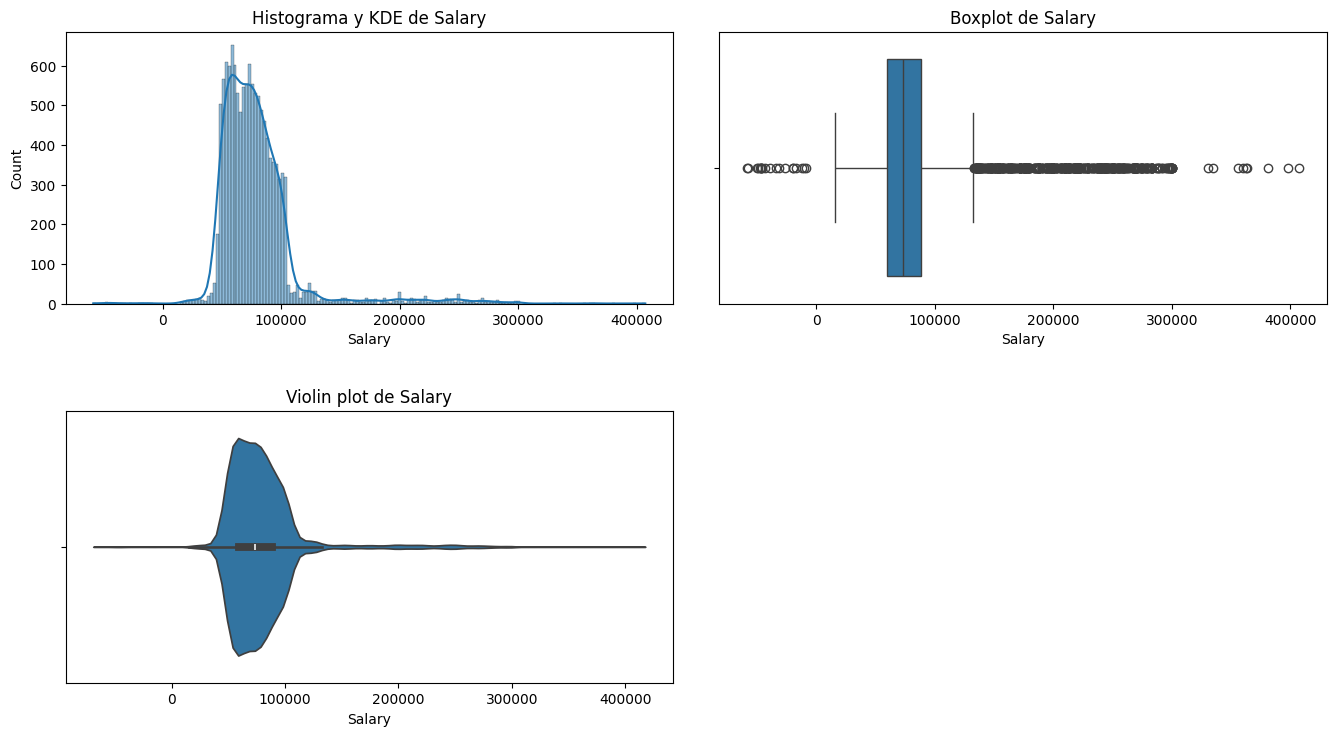

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(-58486.0),
 'max': np.float64(407228.0),
 'mean': np.float64(79245.61),
 'median': np.float64(73455.0),
 'std': np.float64(35008.3),
 'percentil_25': np.float64(59246.5),
 'percentil_75': np.float64(88517.5)}

In [35]:
sp_eda.exploracion_num(df_lh,'Salary', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Salary: Ingreso anual estimado del cliente.

In [36]:
negativos = df_lh[df_lh['Salary'] < 0].sort_values(by='Salary')
print(f"Número de salarios negativos: {len(negativos)}")
print(negativos[['Salary']])

Número de salarios negativos: 20
        Salary
7373  -58486.0
16735 -57297.0
1082  -49830.0
8767  -49001.0
14327 -47310.0
2471  -46683.0
12596 -46470.0
16431 -46303.0
3575  -45962.0
4712  -43234.0
14355 -39503.0
10232 -34079.0
8576  -31911.0
13564 -26322.0
15416 -19332.0
3932  -19325.0
6570  -17534.0
1894  -12497.0
6560  -10605.0
11635  -9081.0


In [37]:
salario_minimo = df_lh.loc[df_lh['Salary'] >= 0, 'Salary'].min()
print(f"Salario mínimo sin negativos: {salario_minimo}")

Salario mínimo sin negativos: 15609.0


Teniendo en cuenta que:
- El salario mínimo sin contar los negativos es 15.609,0
- Q1 = 59246 --> el 25% más bajo cobra hasta 59.246,0
- Q3 = 88517.5 --> el 25% de los sueldos se encuentran por encima de 88.517,5

Tenemos un rango de valores negativos que van de -9.081,0 a -58.486,0, que en valores absolutos serían: 9.081,0 y 58.486,0.
Esos valores absolutos encajan dentro del rango actual de salarios positivos, por lo que podría considerarse un error de insercion de los datos y transformarlos.

Salary --> Tiene NULLS, un 25.32% de los datos. Tiene 20 valores negativos, se considera un error de inserción de los datos y se corrigen convirtiéndolos en valores absolutos. Habrá que tomar decisiones con los Nulls posteriormente.

In [38]:
# Convertir valores negativos a positivos (valor absoluto)
df_lh['Salary'] = df_lh['Salary'].abs()

La columna 'Salary' es de tipo float64.
El número total de valores únicos es de 5890.
Hay muchos valores únicos, aquí algunos ejemplos: [ 83236.     nan 103495.  51124. 100159.  66444.  49618.  90175. 128118.
  94092.  89062. 102400.  98629.  63795.  54890.  51375.  70222.  40736.
  75861.  69835.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Salary':
 - min: 9081.0
 - max: 407228.0
 - mean: 79359.34
 - median: 73455.0
 - std: 34749.69
 - percentil_25: 59246.5
 - percentil_75: 88517.5
--------------------------------------------------------------------------

Tabla completa describe():
count     12499.000000
mean      79359.340907
std       34749.691464
min        9081.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 532
Conteo de outliers por 

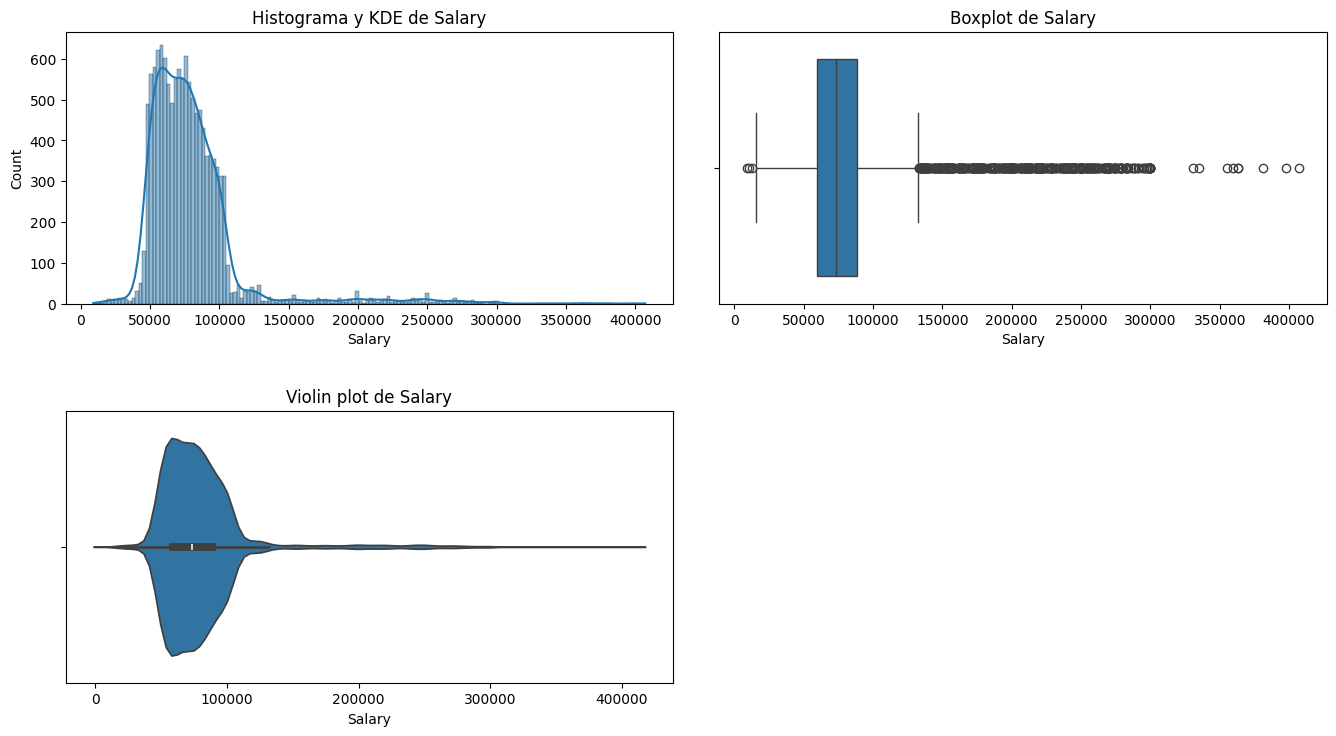

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(9081.0),
 'max': np.float64(407228.0),
 'mean': np.float64(79359.34),
 'median': np.float64(73455.0),
 'std': np.float64(34749.69),
 'percentil_25': np.float64(59246.5),
 'percentil_75': np.float64(88517.5),
 'outliers_count': 532,
 'outliers_unique_values': {250253.0: 12,
  199894.0: 12,
  210090.0: 11,
  221857.0: 11,
  198691.0: 11,
  171815.0: 11,
  154475.0: 11,
  152955.0: 10,
  250152.0: 4,
  147572.0: 4,
  163974.0: 3,
  240146.0: 2,
  259461.0: 2,
  239728.0: 2,
  228861.0: 2,
  277737.0: 2,
  133080.0: 2,
  180440.0: 2,
  299953.0: 2,
  239867.0: 2,
  163911.0: 2,
  248809.0: 2,
  150410.0: 2,
  192498.0: 2,
  199426.0: 2,
  218373.0: 2,
  258562.0: 2,
  184518.0: 2,
  274508.0: 2,
  244617.0: 2,
  197007.0: 2,
  187647.0: 2,
  239677.0: 2,
  276623.0: 2,
  256041.0: 2,
  234624.0: 2,
  164418.0: 2,
  220729.0: 2,
  279093.0: 2,
  217943.0: 2,
  187963.0: 2,
  262729.0: 2,
  236612.0: 2,
  175678.0: 2,
  297762.0: 2,
  221274.0: 2,
  213168.0: 2,
  168331.0

In [39]:
sp_eda.exploracion_num(df_lh,'Salary', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# Salary: Ingreso anual estimado del cliente.

In [40]:
sp_eda.exploracion_basica(df_lh, secciones=['nulos'])


### Porcentaje de valores nulos por columna ###
Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64
--------------------------------------------------------------------------


In [41]:
print("Columnas numéricas:", numericas)

Columnas numéricas: ['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


La columna 'CLV' es de tipo float64.
El número total de valores únicos es de 7984.
Hay muchos valores únicos, aquí algunos ejemplos: [3839.14 3839.61 3839.75 3842.79 3844.57 3857.95 3861.49 3863.31 3864.78
 3867.97 3871.07 3872.22 3873.65 3878.77 5303.76 3885.46 3886.5  3886.65
 3887.32 3890.87]
--------------------------------------------------------------------------

📊 Exploración numérica de 'CLV':
 - min: 1898.01
 - max: 83325.38
 - mean: 7988.9
 - median: 5780.18
 - std: 6860.98
 - percentil_25: 3980.84
 - percentil_75: 8940.58
--------------------------------------------------------------------------

Tabla completa describe():
count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: CLV, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 1485
Conteo de outliers por valor único:
CLV
2

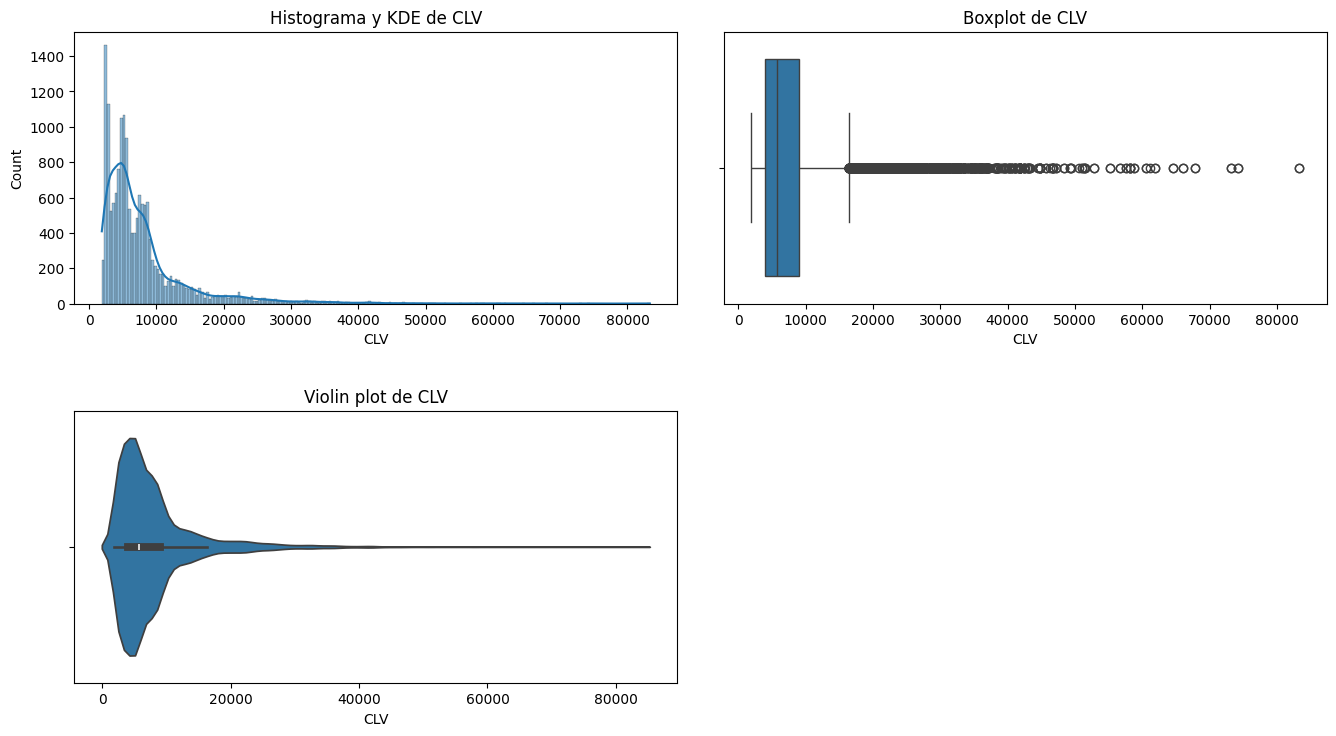

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(1898.01),
 'max': np.float64(83325.38),
 'mean': np.float64(7988.9),
 'median': np.float64(5780.18),
 'std': np.float64(6860.98),
 'percentil_25': np.float64(3980.84),
 'percentil_75': np.float64(8940.58),
 'outliers_count': 1485,
 'outliers_unique_values': {23594.68: 12,
  22103.51: 12,
  21423.64: 12,
  25807.06: 12,
  27789.69: 12,
  25464.82: 11,
  24127.5: 11,
  22332.44: 11,
  19160.99: 11,
  22658.54: 11,
  26197.41: 11,
  20096.89: 11,
  33473.35: 11,
  34611.38: 11,
  41787.9: 11,
  17497.52: 10,
  16468.22: 10,
  16473.17: 9,
  16979.8: 8,
  35850.6: 2,
  18975.46: 2,
  19688.32: 2,
  21205.38: 2,
  22062.55: 2,
  38410.6: 2,
  16547.64: 2,
  16973.74: 2,
  17223.89: 2,
  18704.85: 2,
  19357.37: 2,
  20215.39: 2,
  23706.11: 2,
  16936.27: 2,
  16938.3: 2,
  16963.84: 2,
  17006.0: 2,
  17085.41: 2,
  17103.79: 2,
  17109.39: 2,
  17114.33: 2,
  17208.06: 2,
  60556.19: 2,
  16407.66: 2,
  16464.37: 2,
  16477.77: 2,
  17253.73: 2,
  17367.27: 2,
  17367.5

In [42]:
sp_eda.exploracion_num(df_lh,'CLV', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.

CLV --> Tiene una desviación estándar alta, valores dispersos. Mediana menor que la media, distribución sesgada a la derecha: 'long tail'.

La columna 'Enrollment Year' es de tipo int64.
El número total de valores únicos es de 7.
Los valores únicos son: [2016 2014 2013 2012 2015 2018 2017]


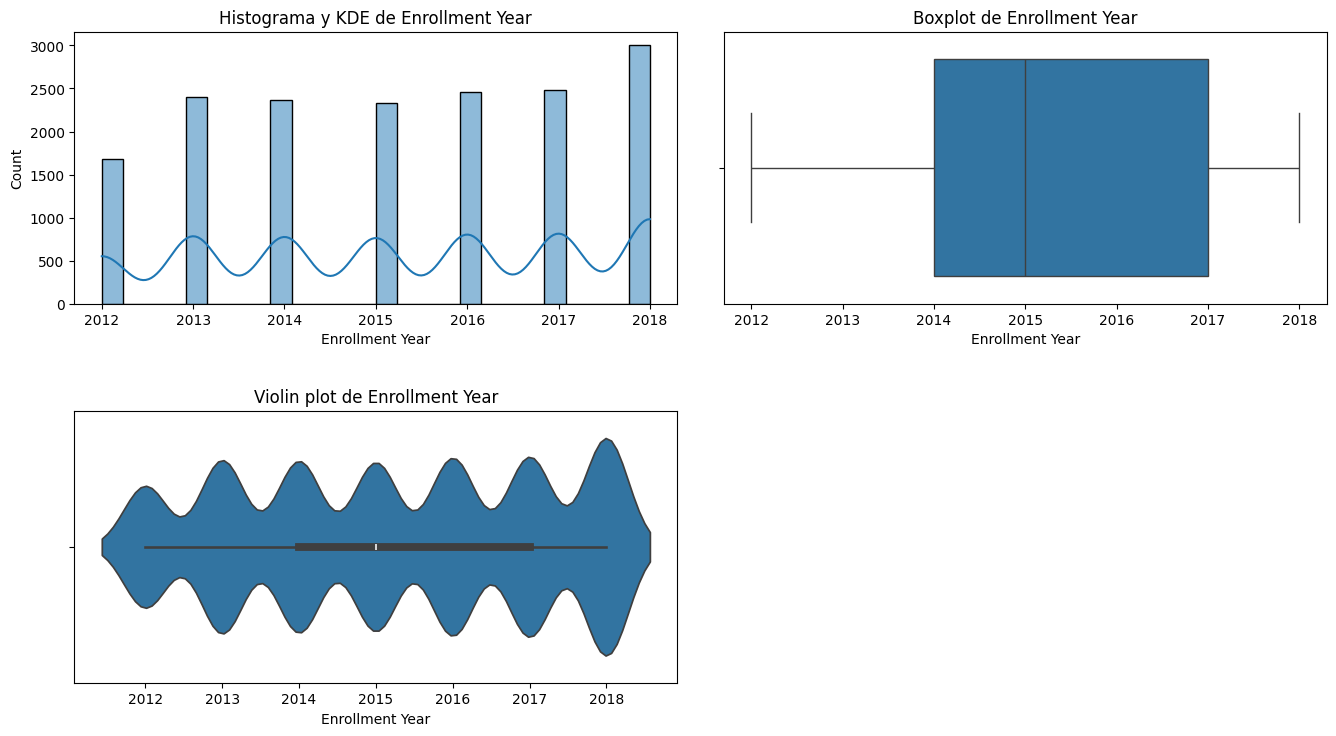

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(2012),
 'max': np.int64(2018),
 'mean': np.float64(2015.25),
 'median': np.float64(2015.0),
 'std': np.float64(1.98),
 'percentil_25': np.float64(2014.0),
 'percentil_75': np.float64(2017.0)}

In [43]:
sp_eda.exploracion_num(df_lh,'Enrollment Year', graficos=True, mostrar_estadisticas=False, mostrar_outliers=False)
# Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.

In [44]:
round(df_lh['Enrollment Year'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Enrollment Year
2012    10.07
2013    14.32
2014    14.16
2015    13.93
2016    14.67
2017    14.86
2018    17.98
Name: proportion, dtype: float64

Enrollment Year --> Valores discretos y limitados (2012 a 2018). La mayoría de clientes (18%) se inscribieron en el 2018. El 2012 fue el año con menor proporción (10%).

In [45]:
numericas

['Loyalty Number',
 'Salary',
 'CLV',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

La columna 'Enrollment Month' es de tipo int64.
El número total de valores únicos es de 12.
Los valores únicos son: [ 2  3  7 10  5  6 12  1 11  8  4  9]


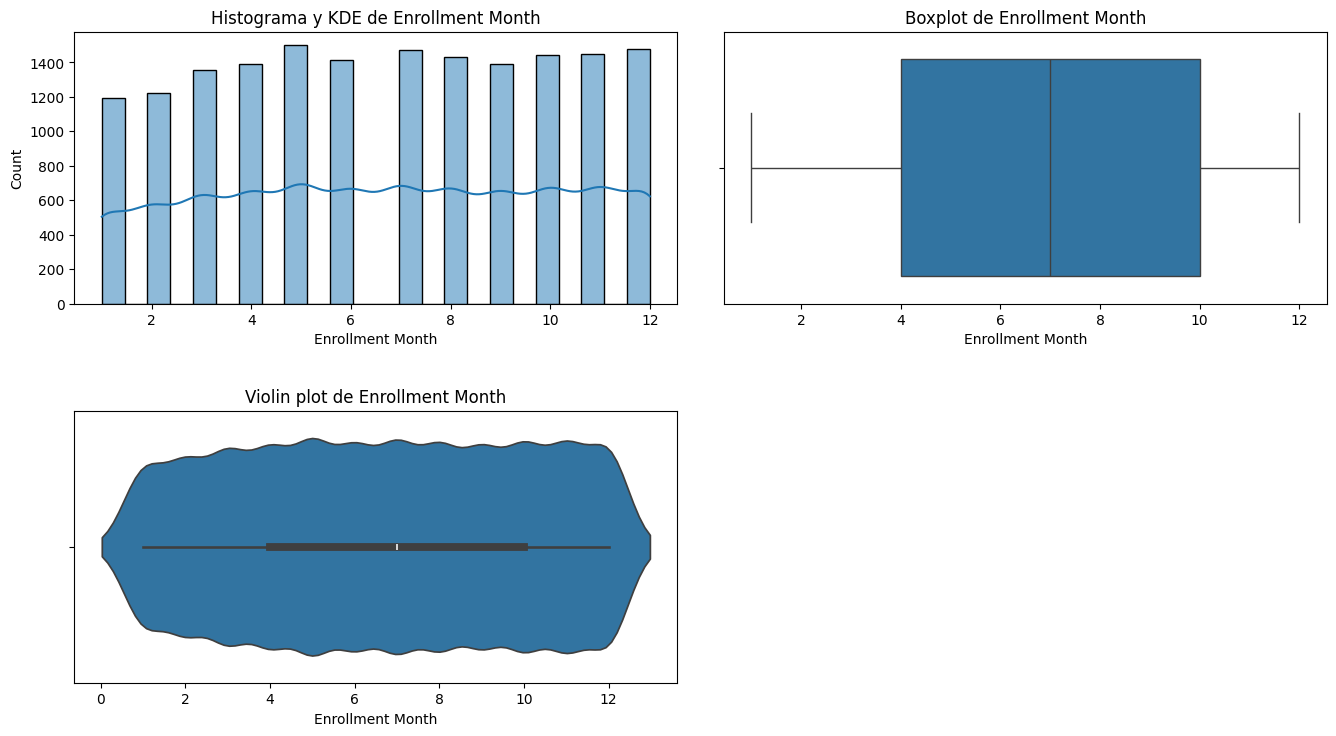

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(1),
 'max': np.int64(12),
 'mean': np.float64(6.67),
 'median': np.float64(7.0),
 'std': np.float64(3.4),
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(10.0)}

In [46]:
sp_eda.exploracion_num(df_lh,'Enrollment Month', graficos=True, mostrar_estadisticas=False, mostrar_outliers=False)
# Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.

In [47]:
round(df_lh['Enrollment Month'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Enrollment Month
1     7.12
2     7.29
3     8.11
4     8.29
5     8.98
6     8.44
7     8.80
8     8.54
9     8.31
10    8.63
11    8.64
12    8.84
Name: proportion, dtype: float64

Enrollment Month --> Valores discretos y limitados (1 a 12). No hay nada a destacar en ningún mes en concreto, la frecuencia de cada mes es muy parecida.

In [48]:
numericas

['Loyalty Number',
 'Salary',
 'CLV',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

La columna 'Cancellation Year' es de tipo float64.
El número total de valores únicos es de 6.
Los valores únicos son: [  nan 2018. 2015. 2017. 2014. 2016. 2013.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Cancellation Year':
 - min: 2013.0
 - max: 2018.0
 - mean: 2016.5
 - median: 2017.0
 - std: 1.38
 - percentil_25: 2016.0
 - percentil_75: 2018.0
--------------------------------------------------------------------------

Tabla completa describe():
count    2067.000000
mean     2016.503145
std         1.380743
min      2013.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2018.000000
Name: Cancellation Year, dtype: float64
--------------------------------------------------------------------------


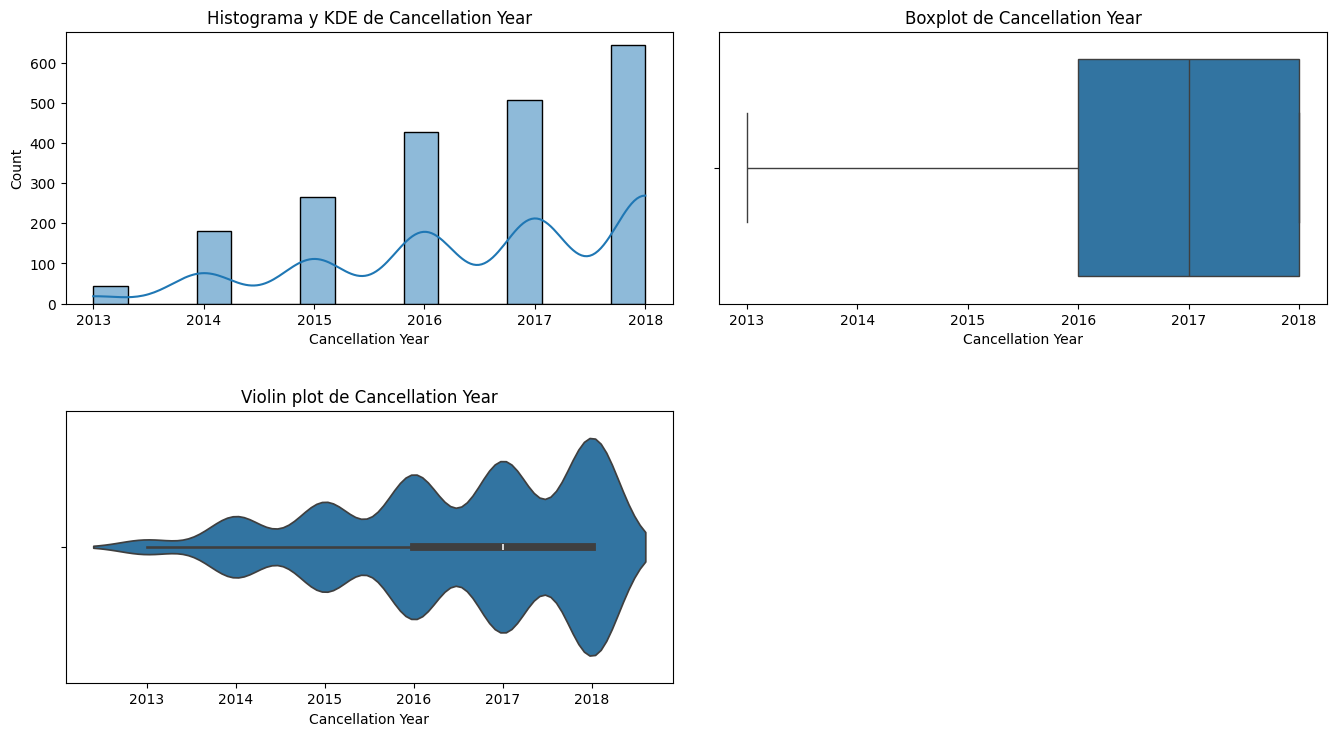

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(2013.0),
 'max': np.float64(2018.0),
 'mean': np.float64(2016.5),
 'median': np.float64(2017.0),
 'std': np.float64(1.38),
 'percentil_25': np.float64(2016.0),
 'percentil_75': np.float64(2018.0)}

In [49]:
sp_eda.exploracion_num(df_lh,'Cancellation Year', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.

In [50]:
round(df_lh['Cancellation Year'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Cancellation Year
2013.0     2.08
2014.0     8.76
2015.0    12.82
2016.0    20.66
2017.0    24.48
2018.0    31.20
Name: proportion, dtype: float64

Cancellation Year --> Tiene NULLS, un 87.65% de los datos. Es de tipo float debido a la presencia de nans. Valores únicos sin nan: 2012 - 2018. Progresivamente han ido cancelando, máximo de cancelaciones en 2018 (31.2%).

La columna 'Cancellation Month' es de tipo float64.
El número total de valores únicos es de 12.
Los valores únicos son: [nan  1. 12.  4.  2.  7. 11.  5.  6. 10.  8.  9.  3.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Cancellation Month':
 - min: 1.0
 - max: 12.0
 - mean: 6.96
 - median: 7.0
 - std: 3.46
 - percentil_25: 4.0
 - percentil_75: 10.0
--------------------------------------------------------------------------

Tabla completa describe():
count    2067.000000
mean        6.962748
std         3.455297
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Cancellation Month, dtype: float64
--------------------------------------------------------------------------


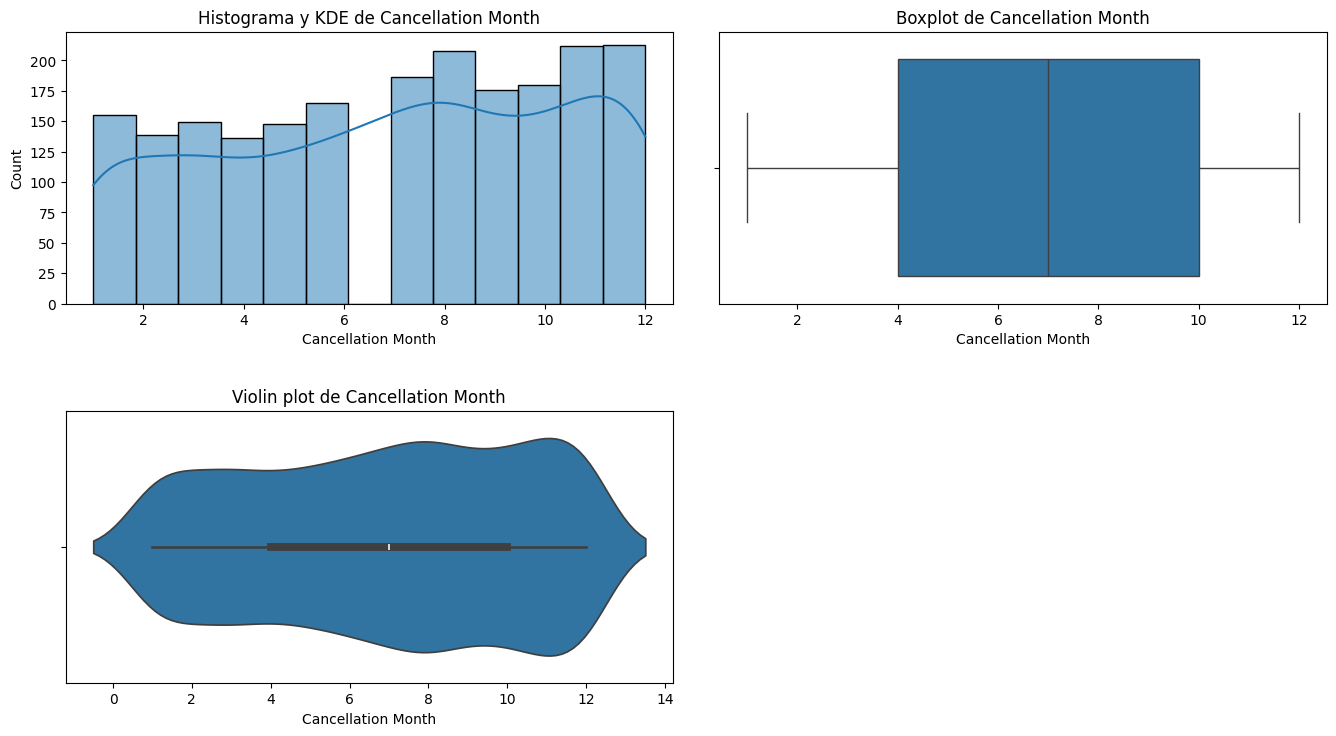

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(1.0),
 'max': np.float64(12.0),
 'mean': np.float64(6.96),
 'median': np.float64(7.0),
 'std': np.float64(3.46),
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(10.0)}

In [51]:
sp_eda.exploracion_num(df_lh,'Cancellation Month', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.

In [52]:
round(df_lh['Cancellation Month'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Cancellation Month
1.0      7.50
2.0      6.72
3.0      7.21
4.0      6.58
5.0      7.16
6.0      7.98
7.0      9.00
8.0     10.06
9.0      8.51
10.0     8.71
11.0    10.26
12.0    10.30
Name: proportion, dtype: float64

Cancellation Month --> Tiene NULLS, un 87.65% de los datos. Es de tipo float debido a la presencia de nans. Valores discretos y limitados (1 a 12) sin incluir nans. Se observan mayores cancelaciones sobretodo en los meses de noviembre (10.26%) y diciembre (10.30%) seguidos de cerca por agosto (10.06%). Meses con menos cancelaciones son abril (6.58%) y febrero (6.72%).

In [53]:
categoricas

['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Marital Status',
 'Loyalty Card',
 'Enrollment Type']

--------------------------------------------------------------------------

📊 Exploración categórica de 'Province':
 - Moda: Ontario
 - Cardinalidad (nº de categorías distintas): 11
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64


Frecuencias relativas (%):


Province
Ontario                 32.29
British Columbia        26.34
Quebec                  19.72
Alberta                  5.79
Manitoba                 3.93
New Brunswick            3.80
Nova Scotia              3.09
Saskatchewan             2.44
Newfoundland             1.54
Yukon                    0.66
Prince Edward Island     0.39
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Province
Ontario             5404
British Columbia    4409
Quebec              3300
Alberta              969
Manitoba             658
New Brunswick        636
Nova Scotia          518
Saskatchewan         409
Newfoundland         258
Yukon                110
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 2


Province
Yukon                   0.66
Prince Edward Island    0.39
Name: proportion, dtype: float64

--------------------------------------------------------------------------


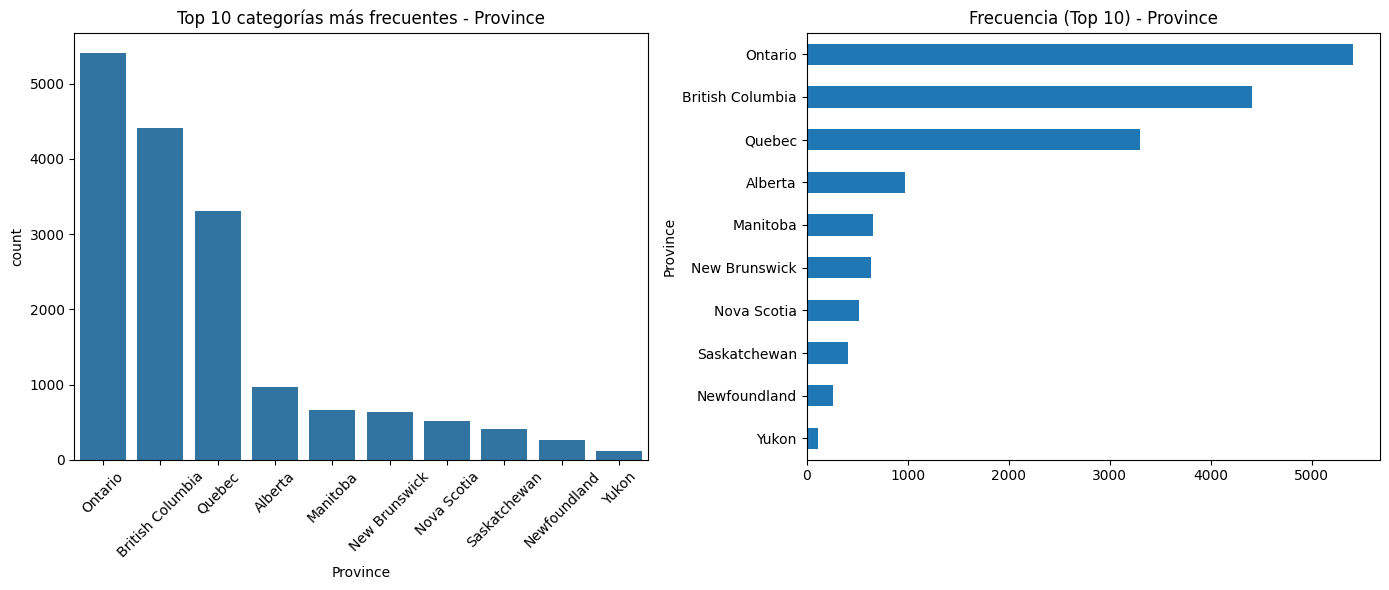

{'moda': 'Ontario',
 'cardinalidad': 11,
 'frecuencias_abs': Province
 Ontario                 5404
 British Columbia        4409
 Quebec                  3300
 Alberta                  969
 Manitoba                 658
 New Brunswick            636
 Nova Scotia              518
 Saskatchewan             409
 Newfoundland             258
 Yukon                    110
 Prince Edward Island      66
 Name: count, dtype: int64,
 'frecuencias_rel': Province
 Ontario                 32.29
 British Columbia        26.34
 Quebec                  19.72
 Alberta                  5.79
 Manitoba                 3.93
 New Brunswick            3.80
 Nova Scotia              3.09
 Saskatchewan             2.44
 Newfoundland             1.54
 Yukon                    0.66
 Prince Edward Island     0.39
 Name: proportion, dtype: float64,
 'categorias_raras': Province
 Yukon                   0.66
 Prince Edward Island    0.39
 Name: proportion, dtype: float64}

In [54]:
sp_eda.exploracion_cat(df_lh,'Province', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).

Province --> Las províncias con mayor frecuencia relativa son: Ontario (32.29%), British Columbia (26.34%) y Quebec (19.72%). Las que tienen una menor frecuencia relativa: Yukon (0.66%) y Prince Edward Island (0.39%). Hay un total de 11 valores únicos.

--------------------------------------------------------------------------

📊 Exploración categórica de 'City':
 - Moda: Toronto
 - Cardinalidad (nº de categorías distintas): 29
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown       66
Name: count, dtype: int64


Frecuencias relativas (%):


City
Toronto           20.02
Vancouver         15.43
Montreal          12.30
Winnipeg           3.93
Whistler           3.48
Halifax            3.09
Ottawa             3.04
Trenton            2.90
Edmonton           2.90
Quebec City        2.90
Dawson Creek       2.65
Fredericton        2.54
Regina             2.44
Kingston           2.40
Tremblant          2.38
Victoria           2.32
Hull               2.14
West Vancouver     1.94
St. John's         1.54
Thunder Bay        1.53
Sudbury            1.36
Moncton            1.26
Calgary            1.14
Banff              1.07
London             1.04
Peace River        0.68
Whitehorse         0.66
Kelowna            0.53
Charlottetown      0.39
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


City
Toronto        3351
Vancouver      2582
Montreal       2059
Winnipeg        658
Whistler        582
Halifax         518
Ottawa          509
Trenton         486
Edmonton        486
Quebec City     485
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 4


City
Peace River      0.68
Whitehorse       0.66
Kelowna          0.53
Charlottetown    0.39
Name: proportion, dtype: float64

--------------------------------------------------------------------------


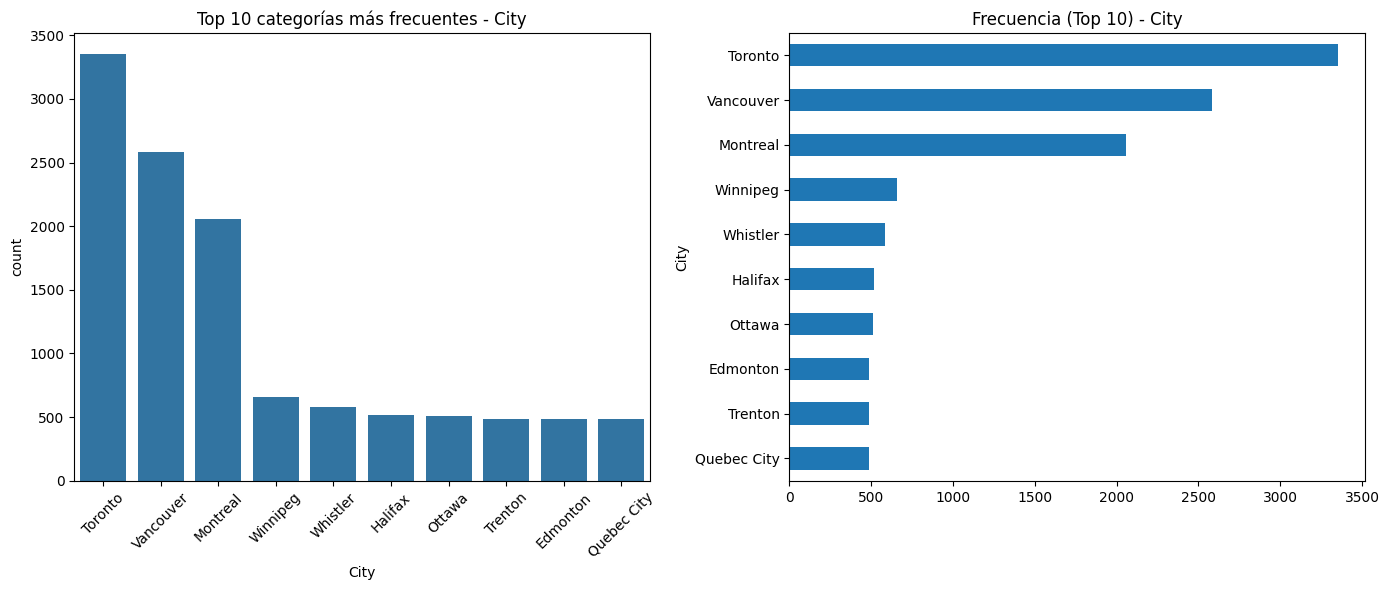

{'moda': 'Toronto',
 'cardinalidad': 29,
 'frecuencias_abs': City
 Toronto           3351
 Vancouver         2582
 Montreal          2059
 Winnipeg           658
 Whistler           582
 Halifax            518
 Ottawa             509
 Trenton            486
 Edmonton           486
 Quebec City        485
 Dawson Creek       444
 Fredericton        425
 Regina             409
 Kingston           401
 Tremblant          398
 Victoria           389
 Hull               358
 West Vancouver     324
 St. John's         258
 Thunder Bay        256
 Sudbury            227
 Moncton            211
 Calgary            191
 Banff              179
 London             174
 Peace River        113
 Whitehorse         110
 Kelowna             88
 Charlottetown       66
 Name: count, dtype: int64,
 'frecuencias_rel': City
 Toronto           20.02
 Vancouver         15.43
 Montreal          12.30
 Winnipeg           3.93
 Whistler           3.48
 Halifax            3.09
 Ottawa             3.04
 Trenton  

In [55]:
sp_eda.exploracion_cat(df_lh,'City', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# City: Ciudad de residencia del cliente.

City --> Las ciudades con mayor frecuencia relativa son: Toronto (20.02%), Vancouver (15.43%) y Montreal (12.30%). Se consideran categorías raras (< 1.0%) 4 ciudades: Peace River (0.68%), Whitehorse (0.66%), Kelowna (0.53%), Charlottetown (0.39%). Hay un total de 29 valores únicos.

In [56]:
categoricas

['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Marital Status',
 'Loyalty Card',
 'Enrollment Type']

--------------------------------------------------------------------------

📊 Exploración categórica de 'Postal Code':
 - Moda: V6E 3D9
 - Cardinalidad (nº de categorías distintas): 55
--------------------------------------------------------------------------


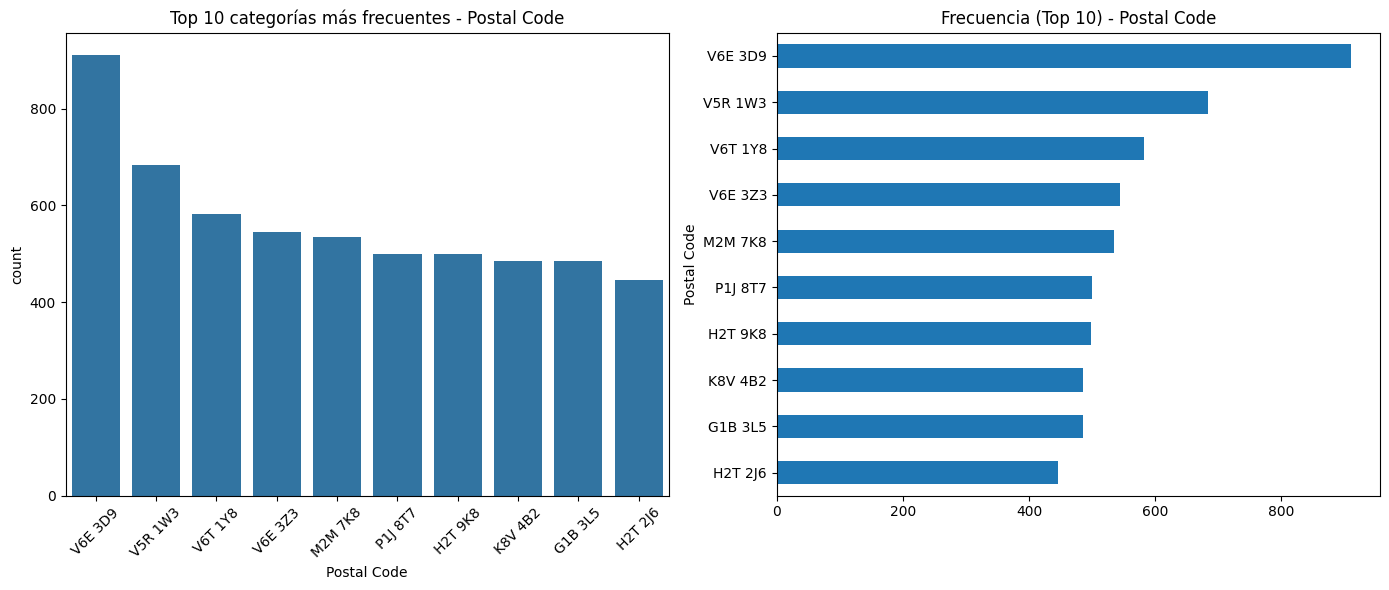

{'moda': 'V6E 3D9',
 'cardinalidad': 55,
 'frecuencias_abs': Postal Code
 V6E 3D9    911
 V5R 1W3    684
 V6T 1Y8    582
 V6E 3Z3    544
 M2M 7K8    534
 P1J 8T7    500
 H2T 9K8    499
 K8V 4B2    486
 G1B 3L5    485
 H2T 2J6    446
 U5I 4F1    444
 V1E 4R6    443
 E3B 2H2    425
 R2C 0M5    415
 M9K 2P4    401
 H5Y 2S9    398
 K1F 2R2    389
 V10 6T5    389
 H2Y 2W2    365
 J8Y 3Z5    358
 M8Y 4K8    340
 H4G 3T4    338
 B3J 9S2    329
 V6V 8Z3    324
 P2T 6G3    322
 H2Y 4R4    315
 M1R 4K3    313
 P1L 8X8    282
 P1W 1K4    275
 T9G 1W3    266
 A1C 6H9    258
 M2Z 4K1    257
 K8T 5M5    256
 P5S 6R4    246
 M5V 1G5    227
 S6J 3G0    226
 T3G 6Y6    220
 E1A 2A7    211
 T3E 2V9    191
 B3C 2M8    189
 S1J 3C5    183
 T4V 1D4    179
 M5B 3E4    174
 M2M 6J7    153
 R6Y 4T5    143
 M2P 4F6    126
 K1G 4Z0    120
 T9O 2W2    113
 Y2K 6R0    110
 R3R 3T4    100
 H3T 8L4     89
 V09 2E9     88
 C1A 6E8     66
 H3J 5I6      7
 M3R 4K8      3
 Name: count, dtype: int64,
 'frecuencias_rel':

In [57]:
sp_eda.exploracion_cat(df_lh,'Postal Code', graficos=True, mostrar_tablas=False, top=10, detectar_raras=False)
# Postal Code: Código postal del cliente.

Postal Code --> Hay 55 categorías distintas. Estan formados por combinaciones de letras y números (categórica).

In [58]:
sp_eda.exploracion_cat(df_lh,'Gender', graficos=False, mostrar_tablas=True, top=10, detectar_raras=False)
# Gender: Género del cliente (ej. Male para masculino y Female para femenino).

--------------------------------------------------------------------------

📊 Exploración categórica de 'Gender':
 - Moda: Female
 - Cardinalidad (nº de categorías distintas): 2
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Gender
Female    8410
Male      8327
Name: count, dtype: int64


Frecuencias relativas (%):


Gender
Female    50.25
Male      49.75
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Gender
Female    8410
Male      8327
Name: count, dtype: int64

{'moda': 'Female',
 'cardinalidad': 2,
 'frecuencias_abs': Gender
 Female    8410
 Male      8327
 Name: count, dtype: int64,
 'frecuencias_rel': Gender
 Female    50.25
 Male      49.75
 Name: proportion, dtype: float64,
 'categorias_raras': None}

Gender --> Female (50.25%) y Male (49.75%).

--------------------------------------------------------------------------

📊 Exploración categórica de 'Education':
 - Moda: Bachelor
 - Cardinalidad (nº de categorías distintas): 5
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


Frecuencias relativas (%):


Education
Bachelor                62.59
College                 25.32
High School or Below     4.67
Doctor                   4.39
Master                   3.04
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 0
--------------------------------------------------------------------------


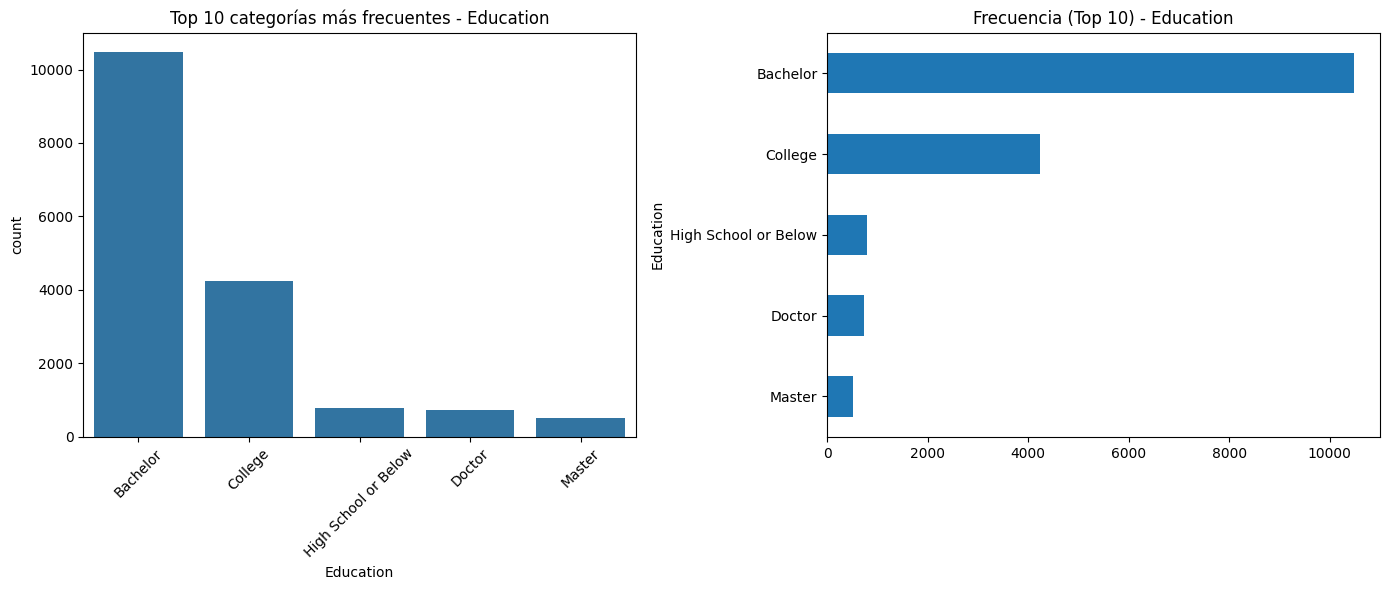

{'moda': 'Bachelor',
 'cardinalidad': 5,
 'frecuencias_abs': Education
 Bachelor                10475
 College                  4238
 High School or Below      782
 Doctor                    734
 Master                    508
 Name: count, dtype: int64,
 'frecuencias_rel': Education
 Bachelor                62.59
 College                 25.32
 High School or Below     4.67
 Doctor                   4.39
 Master                   3.04
 Name: proportion, dtype: float64,
 'categorias_raras': Series([], Name: proportion, dtype: float64)}

In [59]:
sp_eda.exploracion_cat(df_lh,'Education', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).

Education --> 5 Categorías distintas. Frecuencias relativas (%): Bachelor (62.59%), College (25.32%), High School or Below (4.67%), Doctor (4.39%), Master (3.04%).

--------------------------------------------------------------------------

📊 Exploración categórica de 'Marital Status':
 - Moda: Married
 - Cardinalidad (nº de categorías distintas): 3
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64


Frecuencias relativas (%):


Marital Status
Married     58.16
Single      26.79
Divorced    15.04
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 0
--------------------------------------------------------------------------


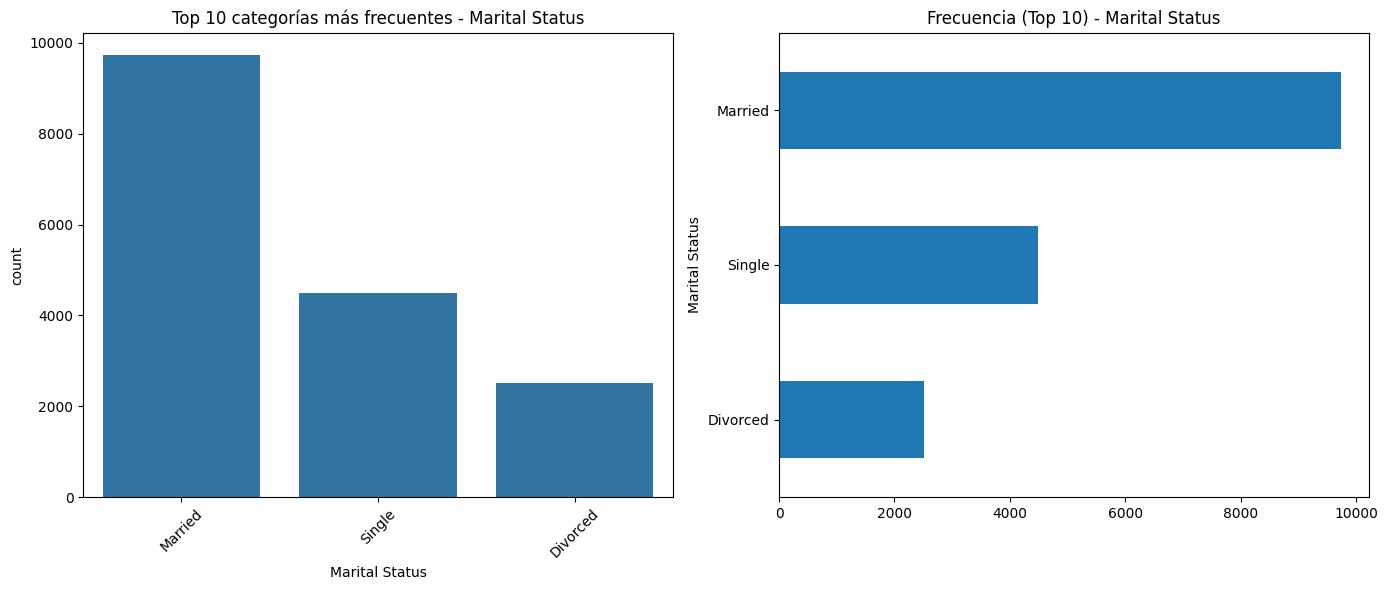

{'moda': 'Married',
 'cardinalidad': 3,
 'frecuencias_abs': Marital Status
 Married     9735
 Single      4484
 Divorced    2518
 Name: count, dtype: int64,
 'frecuencias_rel': Marital Status
 Married     58.16
 Single      26.79
 Divorced    15.04
 Name: proportion, dtype: float64,
 'categorias_raras': Series([], Name: proportion, dtype: float64)}

In [60]:
sp_eda.exploracion_cat(df_lh,'Marital Status', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).

Marital Status --> 3 categorías diferentes. Frecuencias relativas (%): Married (58.16%), Single (26.79%), Divorced (15.04%).

--------------------------------------------------------------------------

📊 Exploración categórica de 'Loyalty Card':
 - Moda: Star
 - Cardinalidad (nº de categorías distintas): 3
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64


Frecuencias relativas (%):


Loyalty Card
Star      45.63
Nova      33.88
Aurora    20.49
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 0
--------------------------------------------------------------------------


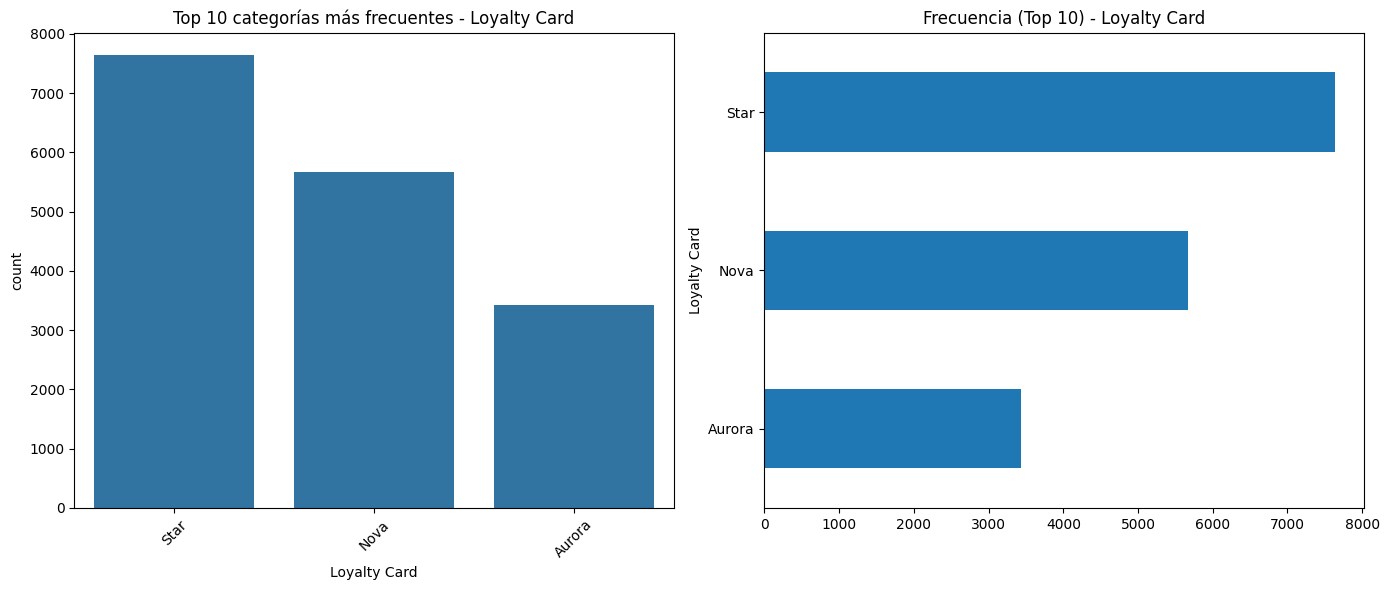

{'moda': 'Star',
 'cardinalidad': 3,
 'frecuencias_abs': Loyalty Card
 Star      7637
 Nova      5671
 Aurora    3429
 Name: count, dtype: int64,
 'frecuencias_rel': Loyalty Card
 Star      45.63
 Nova      33.88
 Aurora    20.49
 Name: proportion, dtype: float64,
 'categorias_raras': Series([], Name: proportion, dtype: float64)}

In [61]:
sp_eda.exploracion_cat(df_lh,'Loyalty Card', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.

Loyalty Card --> 3 categorías diferentes. Frecuencias relativas (%): Star (45.63%), Nova (33.88%), Aurora (20.49%).

--------------------------------------------------------------------------

📊 Exploración categórica de 'Enrollment Type':
 - Moda: Standard
 - Cardinalidad (nº de categorías distintas): 2
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64


Frecuencias relativas (%):


Enrollment Type
Standard          94.2
2018 Promotion     5.8
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 0
--------------------------------------------------------------------------


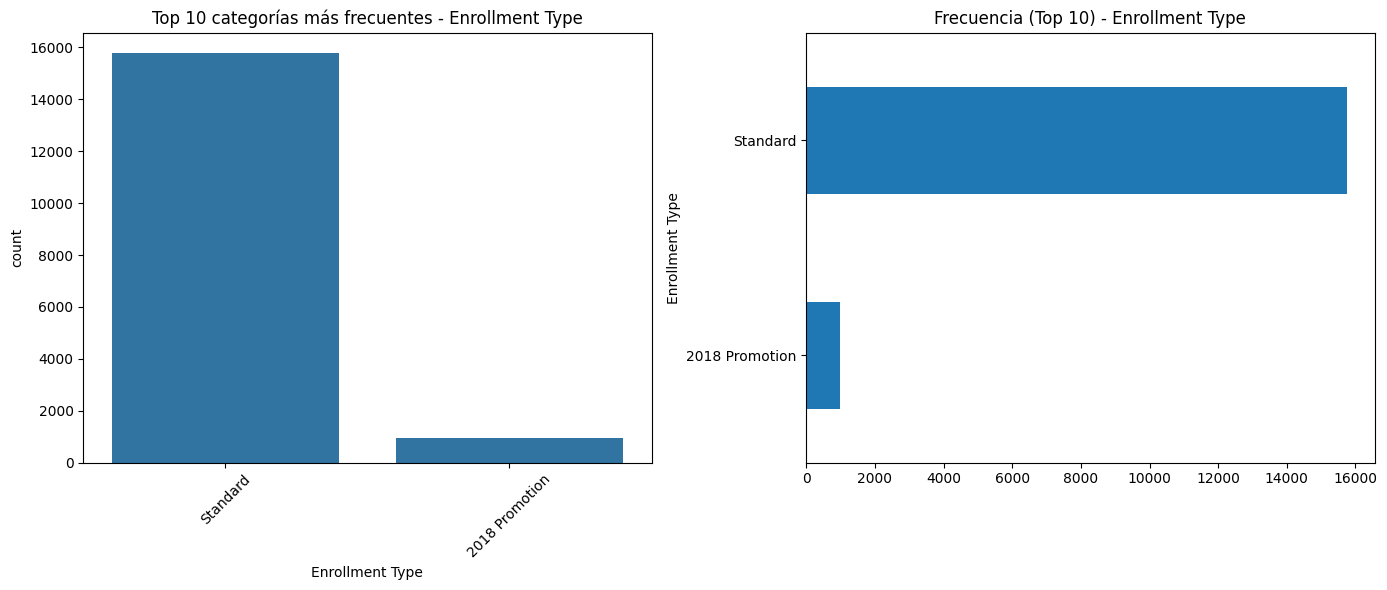

{'moda': 'Standard',
 'cardinalidad': 2,
 'frecuencias_abs': Enrollment Type
 Standard          15766
 2018 Promotion      971
 Name: count, dtype: int64,
 'frecuencias_rel': Enrollment Type
 Standard          94.2
 2018 Promotion     5.8
 Name: proportion, dtype: float64,
 'categorias_raras': Series([], Name: proportion, dtype: float64)}

In [62]:
sp_eda.exploracion_cat(df_lh,'Enrollment Type', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)
# Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

Enrollment Type --> 2 categorías diferentes. Frecuencias relativas (%): Standard (94.2%), 2018 Promotion (5.8%).

## Fase 1 - Transformación & Unión

### Gestión de nulos 'Salary'

In [63]:
df_lh.groupby('Education')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


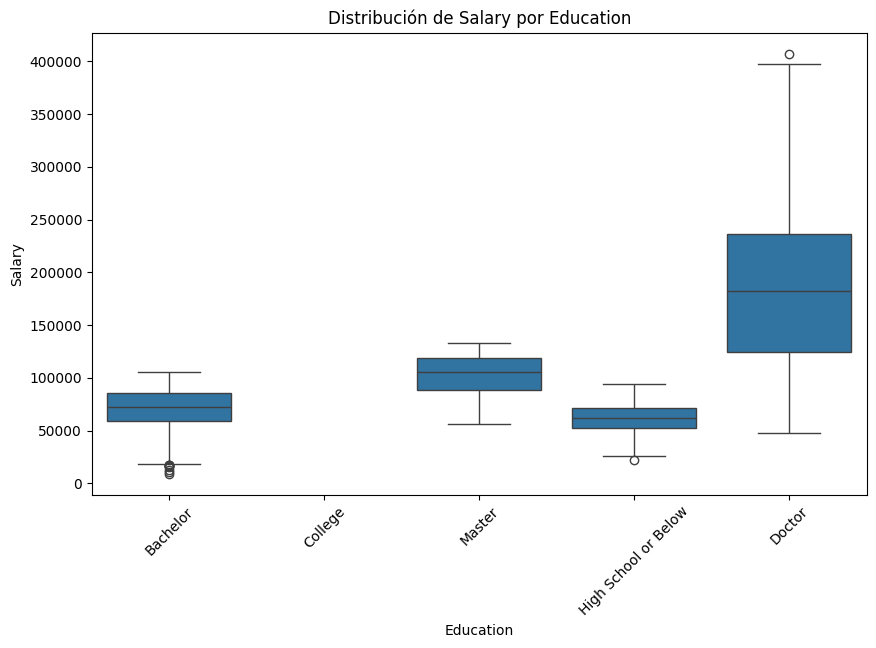

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_lh, x='Education', y='Salary')
plt.title('Distribución de Salary por Education')
plt.xticks(rotation=45)
plt.show()

A destacar:
- "College" tiene 0 registros, por eso todos son NaN. No hay datos de 'Salary' para esa categoría.
- Los que tienen Doctorado tienen un salario promedio mucho más alto y más dispersión.
- Los que tienen High School o menos tienen el salario promedio más bajo.
- Los demás niveles están en medio con distintos rangos.

In [65]:
# Filtrar filas donde Salary es NaN
salary_nulls = df_lh[df_lh['Salary'].isna()]

# Ver las categorías únicas de Education para esos NaN en Salary
education_null_salary = salary_nulls['Education'].unique()

print("Categorías en Education para filas con Salary nulo:", education_null_salary)

# Comprobar si todos los Salary nulos son de la categoría 'College'
todos_son_college = all(education_null_salary == 'College')
print("¿Todos los Salary nulos son de la categoría 'College'? :", todos_son_college)


Categorías en Education para filas con Salary nulo: ['College']
¿Todos los Salary nulos son de la categoría 'College'? : True


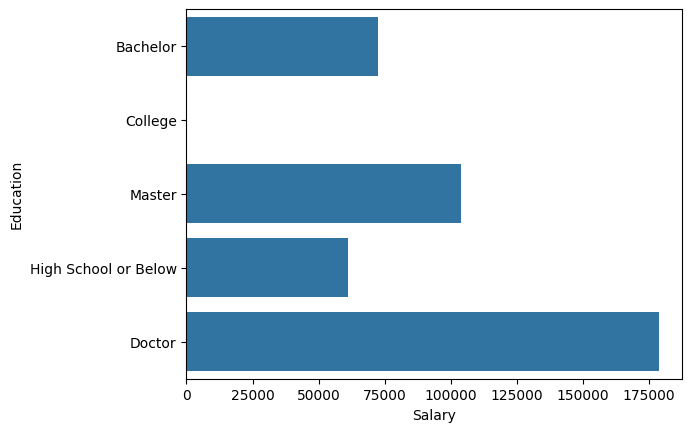

In [66]:
sns.barplot(data=df_lh, x='Salary', y='Education', errorbar=None);    # errorbar=None para quitar los intervalos de confianza que vienen por defecto.

Teniendo en cuenta que en Canadá el orden de Educación es el siguiente (de menos a más):

- High School or Below --> Educación secundaria
- College --> Formación profesional post-secundaria
- Bachelor --> Universidad (título de grado)
- Master	-->	Estudios de postgrado
- Doctor	-->	Doctorado académico

Se podrían rellenar todos los nulos de College con un valor entre la mediana de HS y Bachelor. Mediana y no media porque la mediana es más robusta ante valores extremos o outliers.

In [67]:
# Medianas de Salary por categoría educativa
mediana_hs = df_lh.loc[df_lh['Education'] == 'High School or Below', 'Salary'].median()
mediana_bach = df_lh.loc[df_lh['Education'] == 'Bachelor', 'Salary'].median()

# Valor intermedio (media de las dos medianas)
valor_intermedio = (mediana_hs + mediana_bach) / 2

# Imputar Salary en filas donde Education == 'College' y Salary es NaN
cond = (df_lh['Education'] == 'College') & (df_lh['Salary'].isna())
df_lh.loc[cond, 'Salary'] = valor_intermedio

print(f"Valor imputado para College: {valor_intermedio:.2f}")

Valor imputado para College: 66937.50


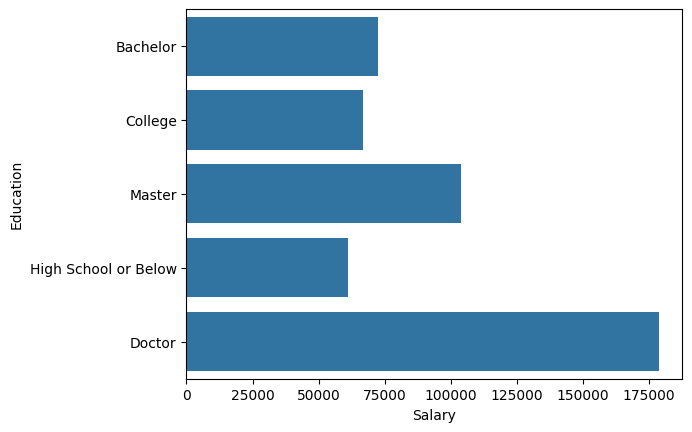

In [68]:
sns.barplot(data=df_lh, x='Salary', y='Education', errorbar=None);

In [69]:
df_lh[df_lh['Salary'] == 66937.5]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,66937.5,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,66937.5,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,66937.5,Single,Star,3839.75,Standard,2013,2,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,66937.5,Single,Star,3857.95,Standard,2014,6,NaN,NaN
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,66937.5,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,66937.5,Married,Star,44771.30,Standard,2018,7,NaN,NaN
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,66937.5,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,66937.5,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,66937.5,Married,Star,61850.19,Standard,2012,12,NaN,NaN


In [70]:
sp_eda.exploracion_basica(df_lh)

### Información general del DataFrame ###
Forma (filas, columnas): (16737, 16)
Columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              16737 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   L

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,16737.0,76213.988588,30511.295223,9081.00,63899.00,66937.50,82940.00,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



### Estadísticas descriptivas para variables categóricas ###


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


### Unión de los dos df en uno completo:

In [71]:
# Asegúrate que la columna es del mismo tipo en ambos
df_fa['Loyalty Number'] = df_fa['Loyalty Number'].astype(str)
df_lh['Loyalty Number'] = df_lh['Loyalty Number'].astype(str)

# Unión directa
df_completo = df_fa.merge(df_lh, on='Loyalty Number', how='inner') 
# inner devuelve solo las filas que tienen coincidencia en ambas tablas (intersección).
# Como ya comprobamos antes que todos los Loyalty Numbers están en ambas tablas, la intersección es el total, y por tanto un inner es suficiente.
# Además, inner es un poco más eficiente y evita que aparezcan filas con datos faltantes.

print(f"Dimensiones del dataframe unido: {df_completo.shape}")
display(df_completo.head())

Dimensiones del dataframe unido: (403760, 25)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,66937.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,66937.5,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [72]:
df_completo.to_csv('files/customer_summary.csv', index=False)
# index=False para que no se guarde la columna de índices.